# Describing the World: Exploring Image Captioning with CNN-LSTM and Transformer Models on the Flickr8k Dataset

## **Introduction**




## Project Contributions

**Amira BOUDAOUD:**  
- Explored various available architectures and prior work  
- Developed Part 2: Image Captioning Using Transformer Architecture, including model design, analysis, and results  
- Handled dataset setup and preprocessing  
- Organized the overall notebook structure  

**Ghofrane BEN RHAIEM:**  
- Investigated existing implementations for the CNN + LSTM approach  
- Developed Part 1: Image Captioning Using CNN + LSTM Architecture  
- Contributed to dataset setup and preprocessing  

---


In recent years, the intersection of computer vision and natural language processing has led to remarkable progress in tasks that require understanding both images and text. One such task is **image captioning**, which involves automatically generating descriptive natural language sentences based on the content of an image.

### What is Image Captioning?

Image captioning is a task that bridges **visual perception** and **language generation**. Given an image, the goal is to produce a coherent and semantically meaningful sentence that accurately describes the visual content. For example, an image of a dog playing in the grass might be captioned as **"A dog running through a grassy field."**

<div align="center">
  <img src="https://av-eks-lekhak.s3.amazonaws.com/media/__sized__/article_images/494205_1_En_7_Fig1_HTML-thumbnail_webp-600x300.webp" alt="image captioning example"><br>
  <em>Figure: Image captioning example</em>
</div>


###  Why Is Image Captioning Important?

Image captioning has wide-ranging applications, including:
- **Assisting visually impaired users** by describing surroundings
- **Improving content search and indexing** through visual metadata
- **Automatic alt-text generation** for web accessibility
- **Human-computer interaction** where machines describe visual scenes in real-time
- Enhancing **image retrieval systems** in search engines and social media

It’s a complex problem requiring models to **extract features from images** and **generate grammatically correct and contextually relevant sentences**, making it a real-world challenge in **AI**.

---

### Purpose of This Notebook

The purpose of this notebook is to apply deep learning concepts learned in the course to a real-world application—**image captioning**—using the **Flickr8k dataset**. We aim to:

- Build and evaluate two prominent architectures for image captioning:
  1. **CNN + LSTM model**, where convolutional neural networks extract image features, and LSTM generates captions sequentially.
  2. **Transformer-based model**, which replaces recurrence with multi-head attention mechanisms and positional embeddings.

These architectures will be compared based on their qualitative and quantitative performance to assess their effectiveness in generating accurate and fluent captions.

In the following sections, we will explore these models in detail and analyze how well they perform on the Flickr8k dataset.


# Dataset Description

### Overview

For this project, we use the **Flickr8k Dataset**, a widely used benchmark collection for the task of image captioning. The dataset consists of:

- **8,000 real-world images**, sourced from **Flickr**, representing diverse scenes and objects
- Each image is paired with **five different human-written captions** that describe the salient entities and actions depicted

These captions were carefully curated to be simple, descriptive, and relevant to the visual content, making the dataset ideal for training and evaluating models in **multimodal learning**.

> **Source**: [Flickr8k Dataset on Kaggle](https://www.kaggle.com/datasets/adityajn105/flickr8k)

---

### Context & Composition

The images in Flickr8k were manually selected from six different Flickr groups and were chosen to represent a wide variety of:

- **Scenes**: both indoor and outdoor
- **Subjects**: such as people, animals, vehicles, sports, nature
- **Activities**: walking, playing, sitting, eating, etc.

The dataset **avoids celebrity photos or iconic locations**, focusing instead on general, real-world content that helps models learn **semantic understanding** of everyday visuals.

Each caption is concise and grammatically correct, offering a natural language summary of the image that is easy for models to learn from and evaluate.

---

### Why This Dataset Fits Our Objective

This dataset is perfectly aligned with the goals of this notebook:

- It allows us to **train models to generate natural language descriptions** from visual input, which is the essence of image captioning.
- With **multiple captions per image**, we can evaluate the **diversity and accuracy** of model-generated captions using robust metrics like BLEU.
- Its **moderate size (8k images)** makes it ideal for training both CNN+LSTM and Transformer models **within Google Colab’s resource constraints**.

Overall, Flickr8k provides the right balance between size, diversity, and quality—making it an excellent dataset for comparing and analyzing deep learning approaches to image captioning.

---


# Part 1: Image Captioning Using CNN + LSTM Architecture

### Overview

In this section, we implement a classic deep learning pipeline for image captioning that combines **Convolutional Neural Networks (CNNs)** and **Long Short-Term Memory (LSTM)** networks.

### Model Architecture:

This architecture follows a typical **encoder-decoder structure**:

- The **CNN** acts as the **encoder**, which is typically pre-trained on large image datasets like ImageNet. It is used to extract high-level visual features from the input image. Instead of producing class labels, the CNN outputs a dense, fixed-length vector that captures the salient content of the image—essentially compressing the image into a rich visual representation that the decoder can use to generate text.
- The **LSTM** acts as the **decoder**, a type of Recurrent Neural Network designed to handle sequential data and retain information over long time steps. In this setting, the LSTM takes the image feature vector from the CNN and sequentially generates words to form a caption. At each step, the LSTM is fed the previously generated word (or the ground-truth word during training) and predicts the next word in the sequence. This continues until a special "end" token is predicted or the maximum sequence length is reached. This setup allows the model to learn how to map visual content to coherent natural language descriptions.


---

### Key Components and main methodology

| Step | Description |
|------|-------------|
| **1. Feature Extraction (CNN)** | Pre-trained CNN (e.g., InceptionV3) is used to extract a fixed-size vector from the input image. |
| **2. Caption Tokenization & Padding** | The text data (captions) are cleaned, tokenized, and converted into integer sequences of fixed length. |
| **3. Sequence Modeling (LSTM)** | An LSTM network learns to predict the next word in a sequence based on the image features and previously generated words. |
| **4. Training Strategy** | The model is trained to minimize prediction loss using teacher forcing — feeding ground-truth captions during training. |
| **5. Caption Generation** | At inference time, techniques like **greedy decoding** or **beam search** are used to generate complete captions. |
| **6. Evaluation** | The generated captions are compared with ground-truth references using BLEU scores to evaluate model performance. |

---

This architecture is widely adopted due to its **simplicity** and **effectiveness** and serves as a strong baseline for image captioning tasks.

<div align="center">
  <img src="https://www.researchgate.net/profile/Shreyansh-Chordia/publication/362306578/figure/fig4/AS:11431281279763604@1727160552340/CNN-LSTM-Architecture-for-Image-Captioning-proposed-by-12.png" alt="image captioning architecture "><br>
  <em>Figure: Image captioning architecture CNN+LSTM</em>
</div>


Let’s now walk through each stage step-by-step.


## Import the required libraries

Here, we will use numpy, pandas, os, seaborn, tenserflow, PIL and scikit learn.

In [ ]:
import tensorflow as tf

# Check GPU availability
if tf.test.gpu_device_name():
    print('GPU device found')
else:
    print("No GPU found")

GPU device found


In [ ]:
# Import the required libraries

import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, add
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
from PIL import Image
from tqdm import tqdm_notebook
from collections import Counter

In [ ]:
# Install Kaggle API
!pip install -q kaggle

# Upload your Kaggle API key (download from Kaggle account)
from google.colab import files
files.upload()  # Upload your kaggle.json file

# Move the API key to the right location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the Flickr8k dataset
!kaggle datasets download -d adityajn105/flickr8k  # Replace with correct dataset name

# Unzip the dataset
!unzip flickr8k.zip -d flickr8k

Streaming output truncated to the last 5000 lines.
  inflating: flickr8k/Images/2844846111_8c1cbfc75d.jpg  
  inflating: flickr8k/Images/2844963839_ff09cdb81f.jpg  
  inflating: flickr8k/Images/2845246160_d0d1bbd6f0.jpg  
  inflating: flickr8k/Images/2845691057_d4ab89d889.jpg  
  inflating: flickr8k/Images/2845845721_d0bc113ff7.jpg  
  inflating: flickr8k/Images/2846037553_1a1de50709.jpg  
  inflating: flickr8k/Images/2846785268_904c5fcf9f.jpg  
  inflating: flickr8k/Images/2846843520_b0e6211478.jpg  
  inflating: flickr8k/Images/2847514745_9a35493023.jpg  
  inflating: flickr8k/Images/2847615962_c330bded6e.jpg  
  inflating: flickr8k/Images/2847859796_4d9cb0d31f.jpg  
  inflating: flickr8k/Images/2848266893_9693c66275.jpg  
  inflating: flickr8k/Images/2848571082_26454cb981.jpg  
  inflating: flickr8k/Images/2848895544_6d06210e9d.jpg  
  inflating: flickr8k/Images/2848977044_446a31d86e.jpg  
  inflating: flickr8k/Images/2849194983_2968c72832.jpg  
  inflating: flickr8k/Images/28507194

In [ ]:
# Define paths
images_directory = '/content/flickr8k/Images/'
captions_path = '/content/flickr8k/captions.txt'

## Load the descriptions

The format of our file is image and caption separated by a newline (“\n”) i.e it consists of the name of the image followed by a space and the description of the image in CSV format. Here we need to map the image to its descriptions by storing them in a dictionary.

In [ ]:
def load_captions(file_path):
    with open(file_path, 'r') as f:
        captions = f.readlines()
        captions = [caption.lower() for caption in captions[1:]]
    return captions

def tokenize_captions(captions):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(captions)
    return tokenizer

captions = load_captions(captions_path)
captions[:15:3]

['1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set of stairs in an entry way .\n',
 '1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playhouse .\n',
 '1001773457_577c3a7d70.jpg,a black dog and a tri-colored dog playing with each other on the road .\n',
 '1001773457_577c3a7d70.jpg,two dogs on pavement moving toward each other .\n',
 '1002674143_1b742ab4b8.jpg,a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .\n']

In [ ]:
# Load and Format Captions as DataFrame for better readability

def load_captions_dataframe(file_path):
    data = []

    with open(file_path, 'r') as f:
        lines = f.readlines()[1:]

        for line in lines:
            line = line.strip().lower()
            if "," in line:
                img, caption = line.split(",", 1)  # Only split at the first comma
                data.append((img.strip(), caption.strip()))

    df = pd.DataFrame(data, columns=["image", "caption"])
    return df

captions_df = load_captions_dataframe(captions_path)
captions_df.head()

image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  a child in a pink dress is climbing up a set o...  
1              a girl going into a wooden building .  
2   a little girl climbing into a wooden playhouse .  
3  a little girl climbing the stairs to her playh...  
4  a little girl in a pink dress going into a woo...

## Cleaning the text

One of the main steps in NLP is to remove noise so that the machine can detect the patterns easily in the text. Noise will be present in the form of special characters such as hashtags, punctuation and numbers. All of which are difficult for computers to understand if they are present in the text. So we need to remove these for better results.

In [ ]:
import re

def clean_text(text):
    # Remove all punctuation (anything that's not a word character or whitespace)
    text = re.sub(r'[^\w\s]', '', text)
    # Remove any digits
    text = re.sub(r'\d+', '', text)
    # Replace multiple spaces with a single space and trim leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning to all captions (after splitting from image name)
cleaned_captions = [clean_text(caption.split(',')[1]) for caption in captions]
cleaned_captions[:15:2]


['a child in a pink dress is climbing up a set of stairs in an entry way',
 'a little girl climbing into a wooden playhouse',
 'a little girl in a pink dress going into a wooden cabin',
 'a black dog and a tricolored dog playing with each other on the road',
 'two dogs of different breeds looking at each other on the road',
 'a little girl covered in paint sits in front of a painted rainbow with her hands in a bowl',
 'a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it',
 'young girl with pigtails painting outside in the grass']

## Cleaning the captions

We further process the captions by adding start and end tokens to define the sentence boundaries.

In [ ]:
captions_IDs = []
for i in range(len(cleaned_captions)):
    item = captions[i].split(',')[0]+'\t'+'start '+cleaned_captions[i]+' end\n'
    captions_IDs.append(item)

captions_IDs[:20:3], len(captions_IDs)

(['1000268201_693b08cb0e.jpg\tstart a child in a pink dress is climbing up a set of stairs in an entry way end\n',
  '1000268201_693b08cb0e.jpg\tstart a little girl climbing the stairs to her playhouse end\n',
  '1001773457_577c3a7d70.jpg\tstart a black dog and a tricolored dog playing with each other on the road end\n',
  '1001773457_577c3a7d70.jpg\tstart two dogs on pavement moving toward each other end\n',
  '1002674143_1b742ab4b8.jpg\tstart a small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it end\n',
  '1003163366_44323f5815.jpg\tstart a man lays on a bench while his dog sits by him end\n',
  '1003163366_44323f5815.jpg\tstart a shirtless man lies on a park bench with his dog end\n'],
 40455)

## Load some images with captions

Here we need to map the images in the training set to their corresponding descriptions which are present in our descriptions variable. Create a list of names of all training images and then create an empty dictionary and map the images to their descriptions using image name as key and a list of descriptions as its value. while mapping the descriptions add unique words at the beginning and end to identify the start and end of the sentence.

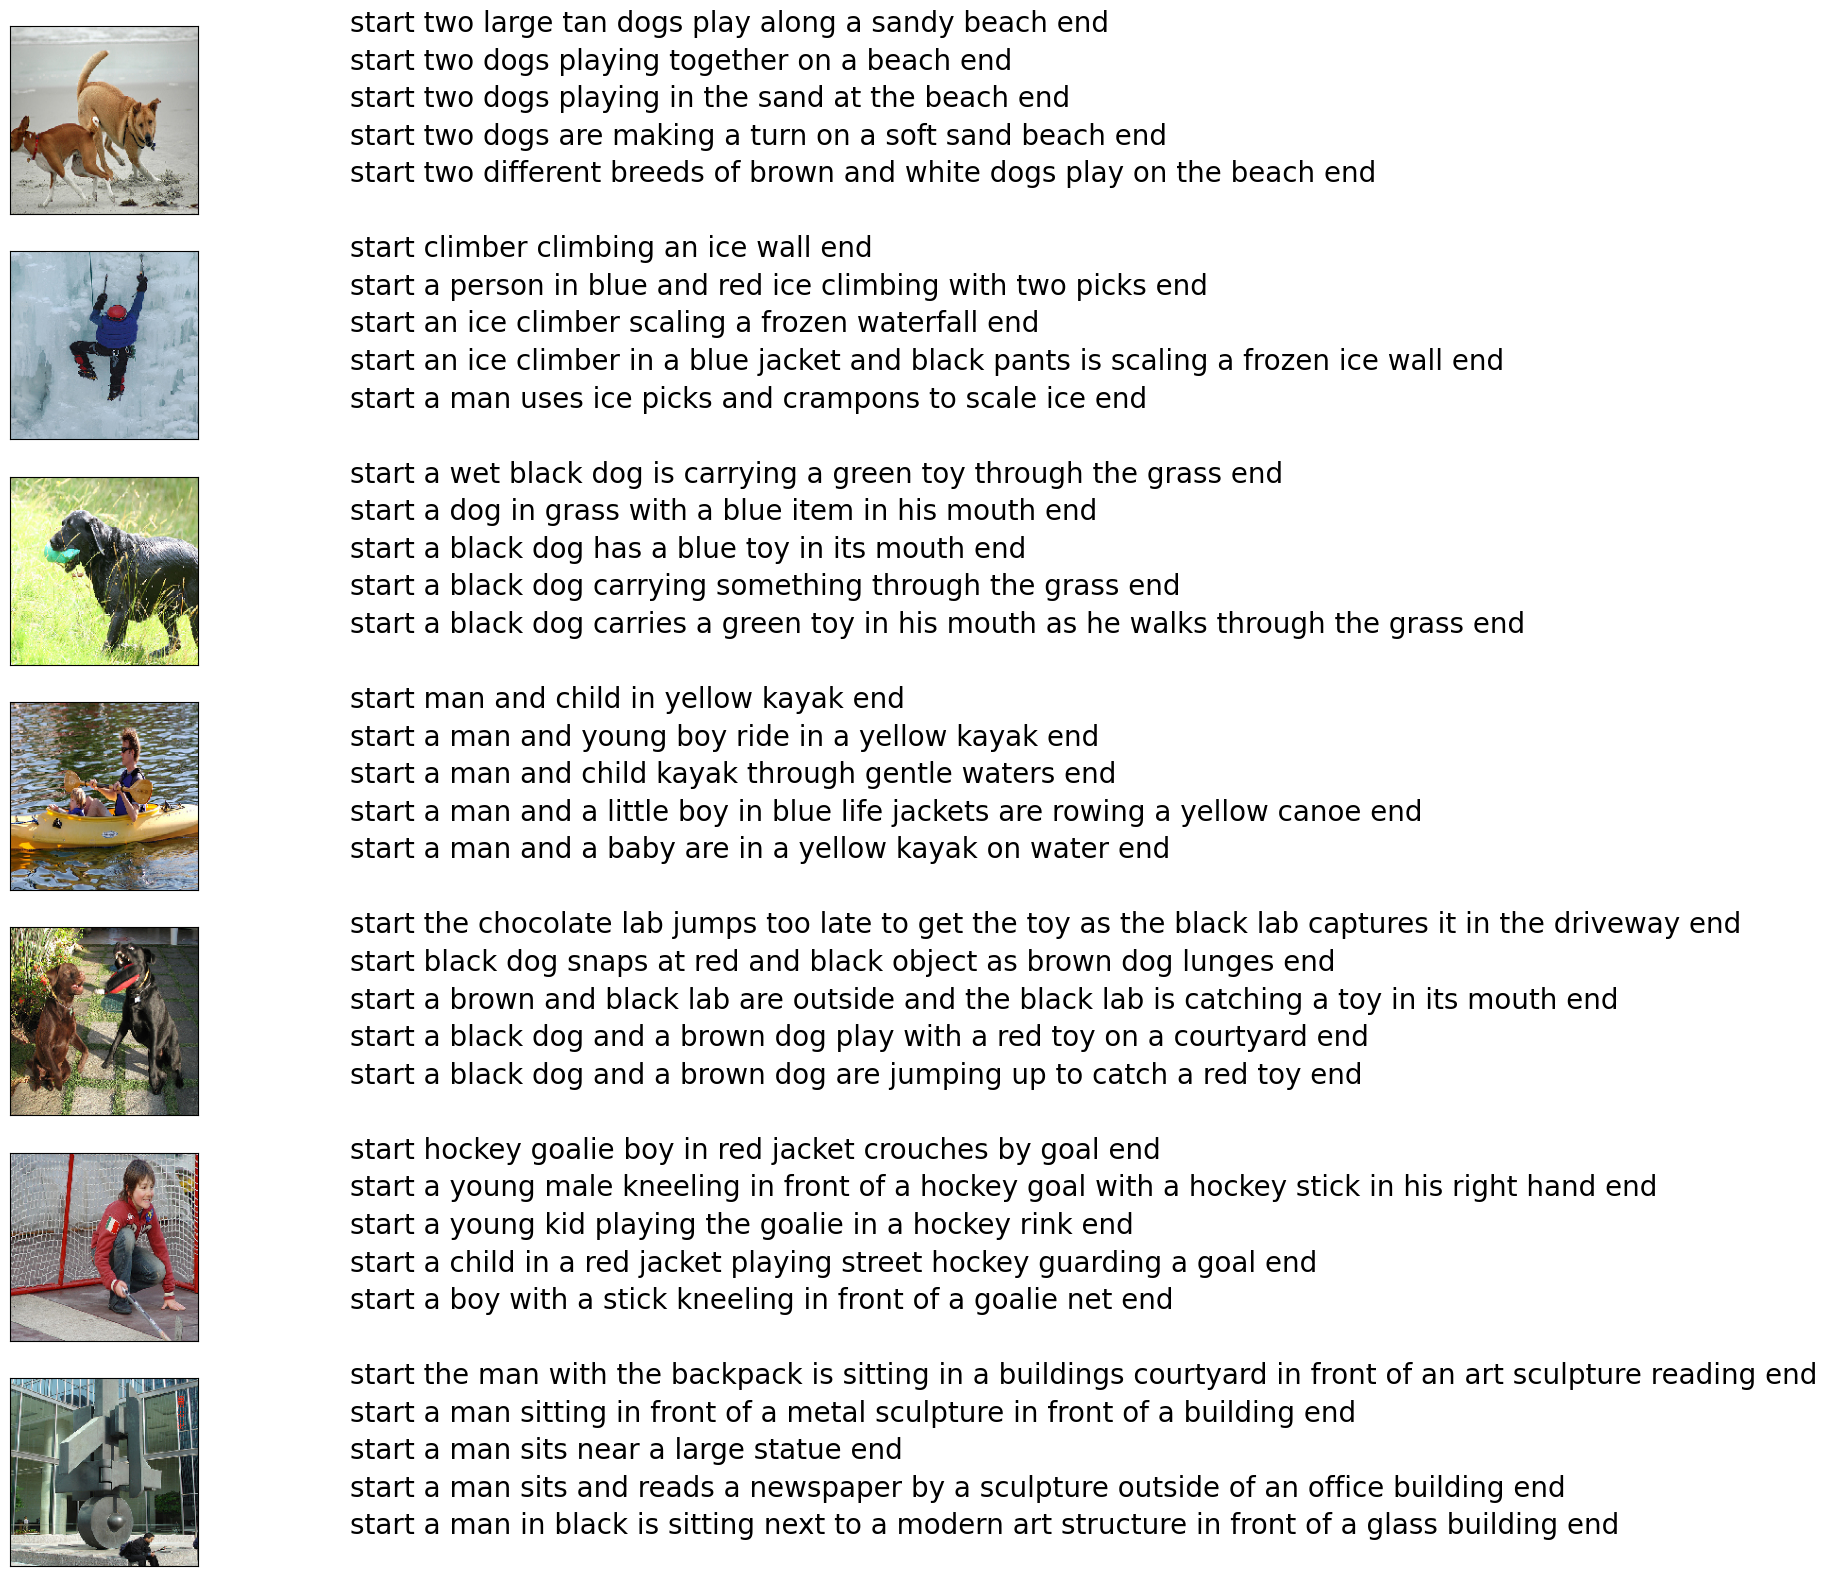

In [ ]:
def visualaization(data, num_of_images):
    captions_dictionary = {}
    for item in data[100:100+(num_of_images)*5]:
        image_id, caption = item.split('\t')
        if image_id not in captions_dictionary:
            captions_dictionary[image_id] = []
        captions_dictionary[image_id].append(caption)
    else:
        list_captions = [x for x in captions_dictionary.items()]

    count = 1
    fig = plt.figure(figsize=(10,20))
    for filename in list(captions_dictionary.keys()):
        captions = captions_dictionary[filename]
        image_load = load_img(images_directory+filename, target_size=(199,199,3))

        ax = fig.add_subplot(num_of_images,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        ax = fig.add_subplot(num_of_images,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(captions))
        for i, caption in enumerate(captions):
            ax.text(0,i,caption,fontsize=20)
        count += 1
    plt.show()

visualaization(captions_IDs, 7)

## Exploring the Caption Length Distribution

We analyze the length of captions to determine an optimal sequence length.

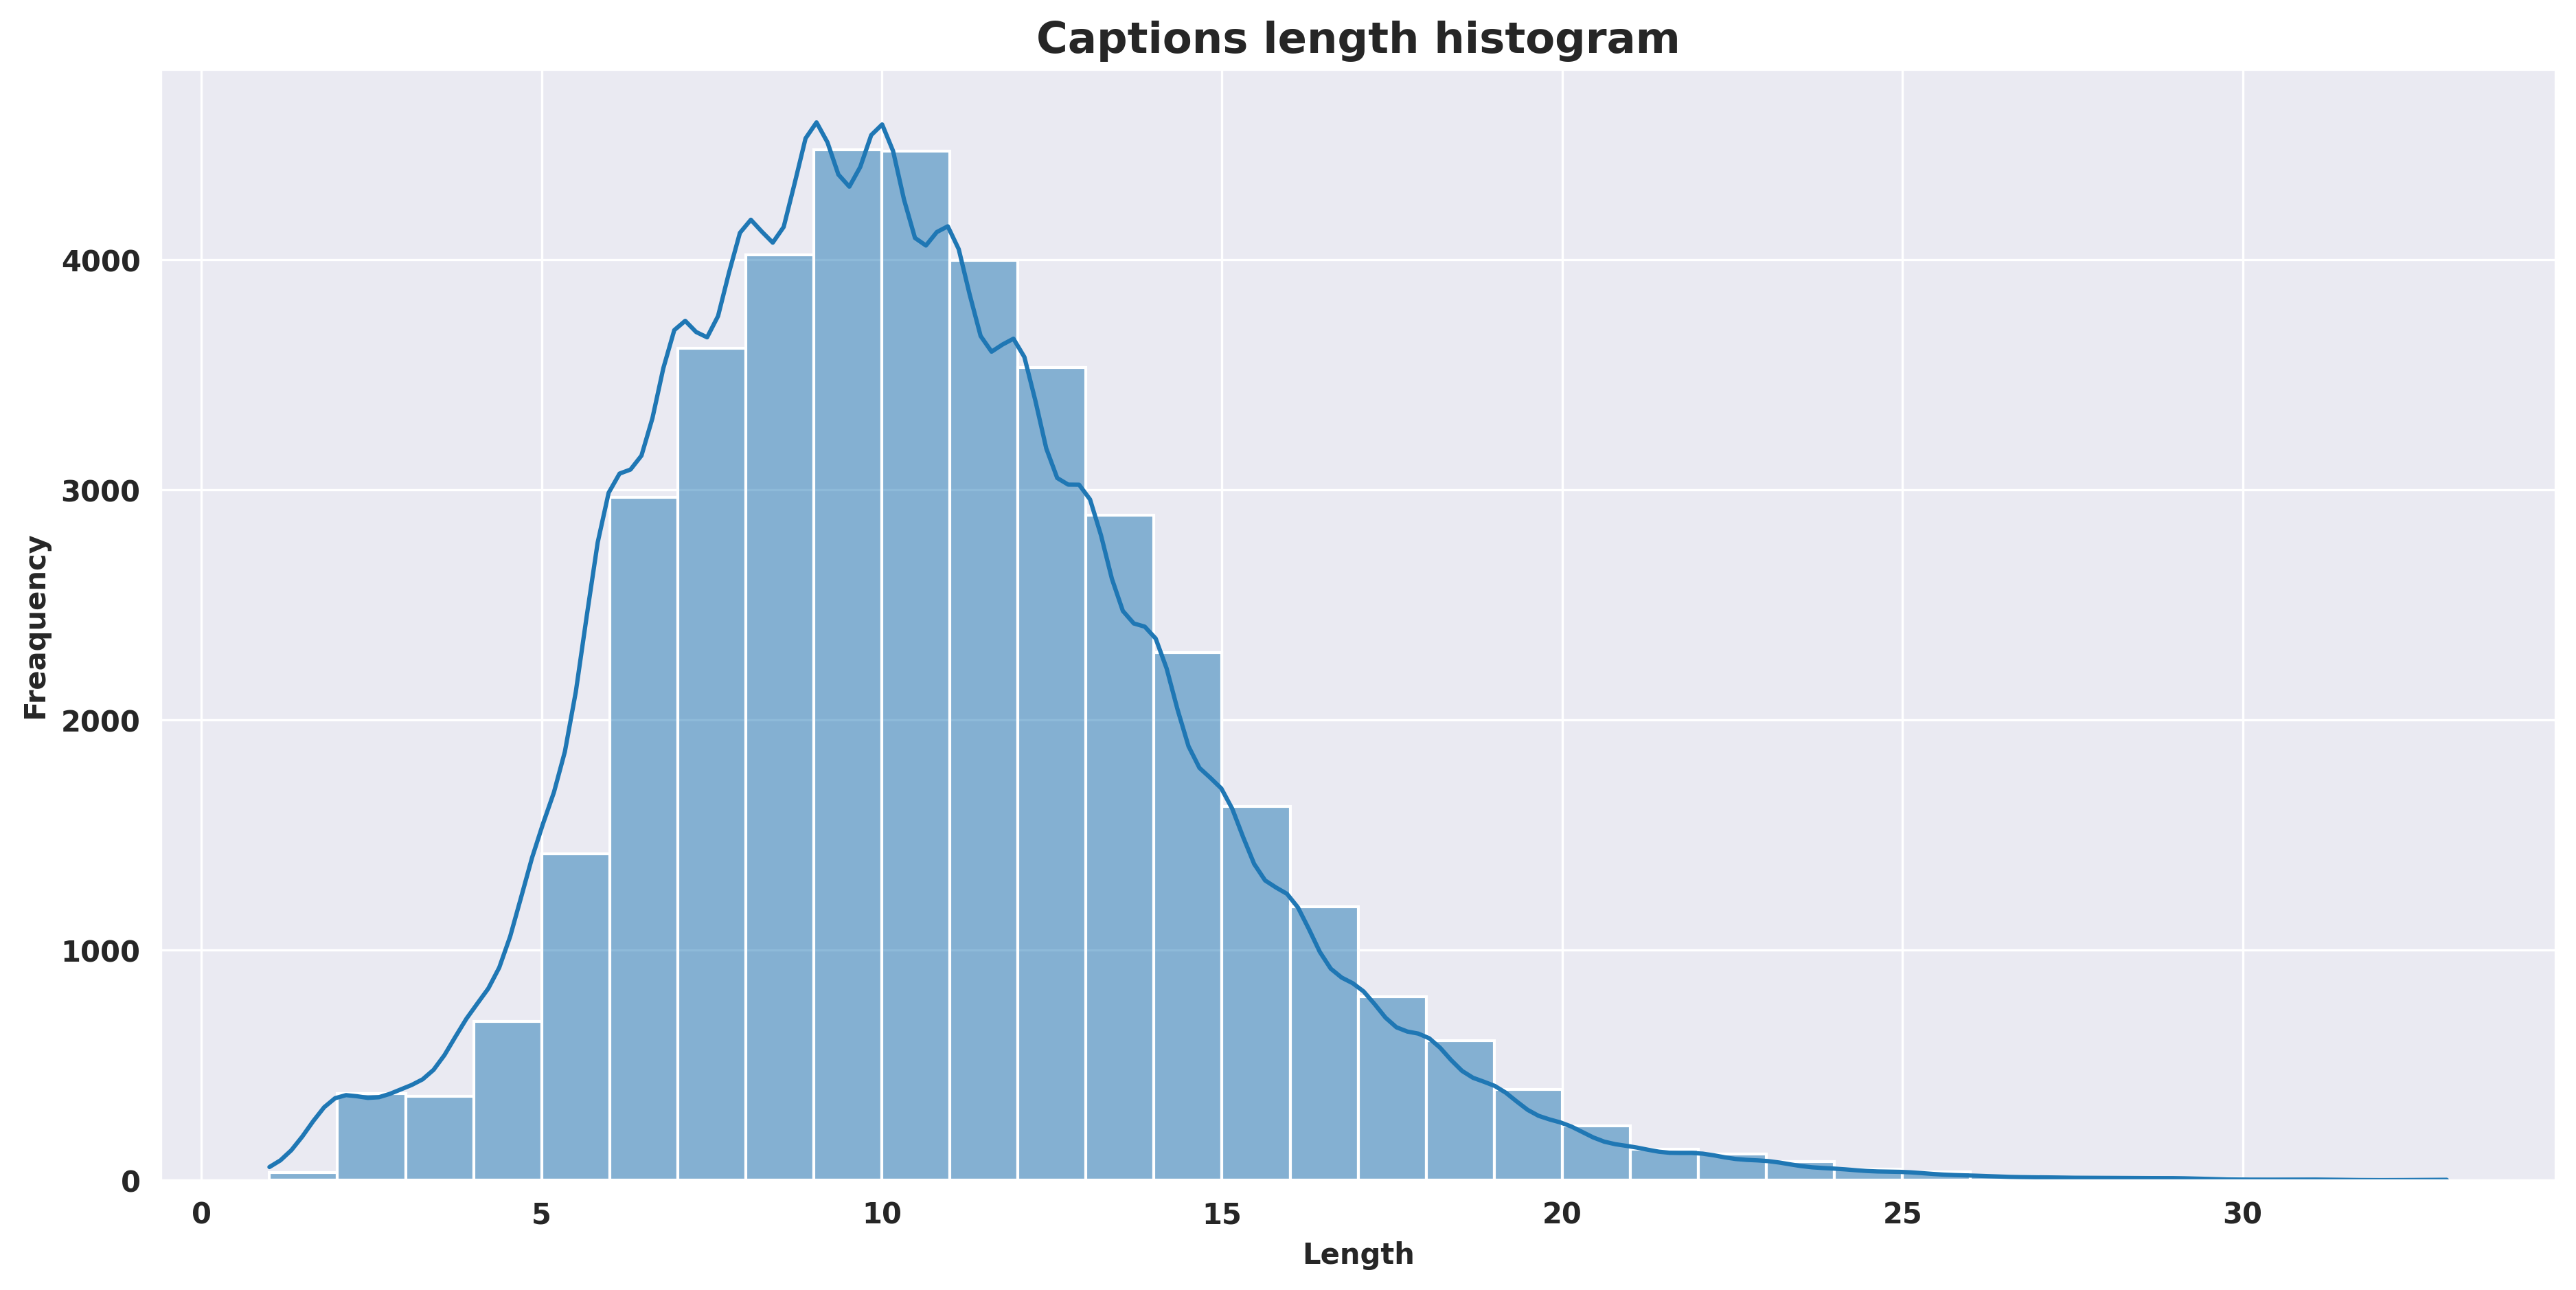

In [ ]:
def captions_length(data):
    plt.figure(figsize=(15, 7), dpi=300)
    sns.set_style('darkgrid')
    sns.histplot(x=[len(x.split(' ')) for x in data], kde=True, binwidth=1)
    plt.title('Captions length histogram', fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.xlabel('Length', fontweight='bold')
    plt.ylabel('Freaquency', fontweight='bold')
    plt.show()

captions_length(cleaned_captions)

## Tokenizing the vocabulary

We will use Keras Tokenizer to convert text data into numerical sequences.

<div align="center">
  <img src="https://lena-voita.github.io/resources/lectures/word_emb/lookup_table.gif" alt="tokenizing the vocabulary"><br>
  <em>Figure: tokenizing the vocabulary example</em>
</div>

In [ ]:
tokenizer = tokenize_captions(cleaned_captions)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8586

In [ ]:
sample_caption = cleaned_captions[1]
print("Original caption:", sample_caption)

# Tokenize it
sequence = tokenizer.texts_to_sequences([sample_caption])[0]
print("Tokenized sequence:", sequence)

Original caption: a girl going into a wooden building
Tokenized sequence: [1, 17, 308, 61, 1, 192, 117]


## Splitting the data into train, validation and test sets

We divide our dataset into training, validation and testing subsets.

In [ ]:
all_image_ids = os.listdir(images_directory)

train_image_ids, val_image_ids = train_test_split(all_image_ids, test_size=0.15, random_state=42)
val_image_ids, test_image_ids = train_test_split(val_image_ids, test_size=0.1, random_state=42)

train_captions, val_captions, test_captions = [], [], []
for caption in captions_IDs:
    image_id, _ = caption.split('\t')

    if image_id in train_image_ids:
        train_captions.append(caption)

    elif image_id in val_image_ids:
        val_captions.append(caption)

    elif image_id in test_image_ids:
        test_captions.append(caption)

    else:
        print('Unknown image ID !')

train_captions[0], val_captions[0], test_captions[0], len(train_captions)/5, len(val_captions)/5, len(test_captions)/5

('1000268201_693b08cb0e.jpg\tstart a child in a pink dress is climbing up a set of stairs in an entry way end\n',
 '101669240_b2d3e7f17b.jpg\tstart a man in a hat is displaying pictures next to a skier in a blue hat end\n',
 '1026685415_0431cbf574.jpg\tstart a black dog carries a green toy in his mouth as he walks through the grass end\n',
 6877.0,
 1092.0,
 122.0)

In [ ]:
print(f"Total number of images: {len(all_image_ids)}")
print(f"Training set - Images: {len(train_image_ids)}, Captions: {len(train_captions)}")
print(f"Validation set - Images: {len(val_image_ids)}, Captions: {len(val_captions)}")
print(f"Test set - Images: {len(test_image_ids)}, Captions: {len(test_captions)}")

# Sanity check: captions should be 5x the number of images
print("\nCaptions per image check:")
print(f"Train: {len(train_captions) / len(train_image_ids):.1f} captions/image")
print(f"Val:   {len(val_captions) / len(val_image_ids):.1f} captions/image")
print(f"Test:  {len(test_captions) / len(test_image_ids):.1f} captions/image")


Total number of images: 8091
Training set - Images: 6877, Captions: 34385
Validation set - Images: 1092, Captions: 5460
Test set - Images: 122, Captions: 610

Captions per image check:
Train: 5.0 captions/image
Val:   5.0 captions/image
Test:  5.0 captions/image


In [ ]:
print("Example captions from each split:\n")
print("Train Caption Example:", train_captions[0])
print("Validation Caption Example:", val_captions[0])
print("Test Caption Example:", test_captions[0])

Example captions from each split:

Train Caption Example: 1000268201_693b08cb0e.jpg	start a child in a pink dress is climbing up a set of stairs in an entry way end

Validation Caption Example: 101669240_b2d3e7f17b.jpg	start a man in a hat is displaying pictures next to a skier in a blue hat end

Test Caption Example: 1026685415_0431cbf574.jpg	start a black dog carries a green toy in his mouth as he walks through the grass end



## Extract the feature vector from all images



<div align="center">
  <img src="https://wngaw.github.io/images/inception_v3_architecture.png"><br>
  <em>Figure: main idea of transfer learning using Inception V3 model</em>
</div>


Now we will give an image as an input to our model but unlike humans, machines cannot understand the image by seeing them. So we need to convert the image into an encoding so that the machine can understand the patterns in it. For this task, I'm using **transfer learning** i.e, we use a pre-trained model that has been already trained on large datasets and extract the features from these models and use them for our work. Here I'm using the InceptionV3 model which has been trained on Imagenet dataset that had 1000 different classes to classify. We can directly import this model from Keras.applications module. We need to remove the last classification layer to get the (2048, ) dimensional feature vector from InceptionV3 model.

In [ ]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(299, 299)) # Load and resize image
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)   # Add batch dimension → (1, 299, 299, 3)
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img

def extract_image_features(model, image_path):
    img = preprocess_image(image_path)
    features = model.predict(img, verbose=0)
    return features

inception_v3_model = InceptionV3(weights = 'imagenet', input_shape=(299, 299, 3))
inception_v3_model.layers.pop() # removes the final classification (dense) layer
inception_v3_model = Model(inputs=inception_v3_model.inputs, outputs=inception_v3_model.layers[-2].output)

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


After extracting features using the modified InceptionV3 model, each image is transformed into a 2048-dimensional feature vector. The output for a single image has the shape:(1, 2048)
- 1: corresponds to the batch size (a single image at inference).

- 2048: represents the rich visual features extracted from the image by InceptionV3 (second-to-last layer).

These features serve as the encoded representation of the image and will be used as input to the LSTM decoder during caption generation.

## Extracting Image Features for Training, Validation and Testing

To train our Image Caption Generator, we need to extract feature vectors from images using the pre-trained InceptionV3 model. These features will serve as inputs to our captioning model. We store the extracted features in dictionaries corresponding to training, validation, and testing datasets.

In [ ]:
train_image_features, val_image_features, test_image_features = {}, {}, {}  # A Dictionary to store image features with their corresponding IDs

pbar = tqdm_notebook(total=len(all_image_ids), position=0, leave=True, colour='green')

for caption in all_image_ids:
    image_id = caption.split('\t')[0]
    image_path = os.path.join(images_directory, image_id)
    image_features = extract_image_features(inception_v3_model, image_path) # Extracting features

    if image_id in train_image_ids:
        train_image_features[image_id] = image_features.flatten()  # Flattening the features
        pbar.update(1)

    elif image_id in val_image_ids:
        val_image_features[image_id] = image_features.flatten()  # Flattening the features
        pbar.update(1)

    elif image_id in test_image_ids:
        test_image_features[image_id] = image_features.flatten()  # Flattening the features
        pbar.update(1)

    else:
        print('Unknown image ID !')

pbar.close()

  0%|          | 0/8091 [00:00<?, ?it/s]

## Creating a Data Generator for Model Training

Since training a deep learning model requires handling large datasets, we implement a data generator to yield batches of image features and corresponding tokenized captions. This approach improves memory efficiency by processing data dynamically rather than loading everything into memory at once.

In [ ]:
def data_generator(captions, image_features, tokenizer, max_caption_length, batch_size):
    num_samples = len(captions)
    image_ids = list(image_features.keys())
    while True:
        np.random.shuffle(image_ids)  # Shuffle image_ids for each epoch
        for start_idx in range(0, num_samples, batch_size):
            end_idx = min(start_idx + batch_size, num_samples)
            X_images, X_captions, y = [], [], []
            for caption in captions[start_idx:end_idx]:
                image_id, caption_text = caption.split('\t')
                caption_text = caption_text.rstrip('\n')
                seq = tokenizer.texts_to_sequences([caption_text])[0] # Tokenizing the caption
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i] # X_caption, Y
                    in_seq = pad_sequences([in_seq], maxlen=max_caption_length, padding='post')[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    X_images.append(image_features[image_id])
                    X_captions.append(in_seq)
                    y.append(out_seq)

            yield {'Features_Input': np.array(X_images, dtype=np.float32),'Sequence_Input': np.array(X_captions, dtype=np.int32)}, np.array(y, dtype=np.float32)



max_caption_length = max(len(caption.split()) for caption in cleaned_captions) + 1

cnn_output_dim = inception_v3_model.output_shape[1] # 2048

output_signature = (
    {
        "Features_Input": tf.TensorSpec(shape=(None, 2048), dtype=tf.float32),
        "Sequence_Input": tf.TensorSpec(shape=(None, max_caption_length), dtype=tf.int32),
    },
    tf.TensorSpec(shape=(None, vocab_size), dtype=tf.float32)
)


batch_size_train = 270
batch_size_val = 150

train_data_generator = tf.data.Dataset.from_generator(
    lambda: data_generator(train_captions, train_image_features, tokenizer, max_caption_length, batch_size_train),
    output_signature=output_signature
)

val_data_generator = tf.data.Dataset.from_generator(
    lambda: data_generator(val_captions, val_image_features, tokenizer, max_caption_length, batch_size_val),
    output_signature=output_signature
)

- This block defines and initializes data generators for both the training and validation datasets. These generators yield batches of training examples in the format required by the model.
- Each yielded batch is a tuple:

({ "Features_Input": X_images, "Sequence_Input": X_captions }, y)

    - Features_Input → shape: (batch_size, 2048)
  The image feature vectors extracted from InceptionV3 for each sample in the batch.

    - Sequence_Input → shape: (batch_size, max_caption_length)
  The padded partial caption sequences as input to the LSTM decoder (e.g., ['a', 'man', 'in']).

    - y → shape: (batch_size, vocab_size)
  The one-hot encoded target word the model should predict next.

- Each batch contains multiple such sequences per caption to enable sequence-to-sequence training, where the model learns to predict the next word in the sequence.

## Building the Image Captioning Model (Encoder-Decoder Architecture)

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*670U1iBhcbd9A91Z-B57LA.png"><br>
  <em>Figure: Image captioning example</em>
</div>

We define the architecture of our Image Captioning model using the Keras Functional API.the model follows a classic Encoder-Decoder structure, where the encoder processes image data and the decoder generates the caption one word at a time.

1. **Encoder — CNN Image Feature Extractor:**
The input is a 2048-dimensional image feature vector extracted from InceptionV3. It is passed through a Batch Normalization and Dense layer to project it into a 256-dimensional latent space, aligning it with the decoder's feature space.

2. **Decoder — LSTM-based Text Processor:**
The input caption (sequence of word indices) is passed through an Embedding layer to map tokens to dense vectors. These are then processed by an LSTM layer to generate a fixed-size context vector representing the partial caption so far.

3. **Decoder Fusion & Prediction:**
The image and text representations are merged (added) and passed through a Dense layer, followed by a final softmax layer to predict the next word in the sequence.

In [ ]:
def build_model(vocab_size, max_caption_length, cnn_output_dim):
    # ----- ENCODER -----
    input_image = Input(shape=(cnn_output_dim,), name='Features_Input')  # Input: 2048-d image feature vector
    fe1 = BatchNormalization()(input_image)                              # Normalize features
    fe2 = Dense(256, activation='relu')(fe1)                             # Project to 256-d space
    fe3 = BatchNormalization()(fe2)                                      # Normalize again

    # ----- DECODER -----
    input_caption = Input(shape=(max_caption_length,), name='Sequence_Input')  # Input: caption tokens
    se1 = Embedding(vocab_size, 256, mask_zero=True)(input_caption)            # Token embedding
    se2 = LSTM(256, implementation=1)(se1)                                     # Process caption sequence

    # ----- FUSION + OUTPUT -----
    decoder1 = add([fe3, se2])                            # Merge encoder and decoder outputs
    decoder2 = Dense(256, activation='relu')(decoder1)    # Combine features
    outputs = Dense(vocab_size, activation='softmax', name='Output_Layer')(decoder2)  # Predict next word

    # ----- COMPILE MODEL -----
    model = Model(inputs=[input_image, input_caption], outputs=outputs, name='Image_Captioning')
    return model

# Build and compile the model
caption_model = build_model(vocab_size, max_caption_length, cnn_output_dim)
optimizer = Adam(learning_rate=0.01, clipnorm=1.0)
caption_model.compile(loss='categorical_crossentropy', optimizer=optimizer)

# Print summary
caption_model.summary()


Model: "Image_Captioning"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Features_Input      │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 2048)      │      8,192 │ Features_Input[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Sequence_Input      │ (None, 34)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    524,544 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 34, 256)   │  2,198,016 │ Sequence_Input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 34)        │          0 │ Sequence_Input[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 256)       │    525,312 │ embedding[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ batch_normalizat… │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     65,792 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Layer        │ (None, 8586)      │  2,206,602 │ dense_1[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,529,482 (21.09 MB)

 Trainable params: 5,524,874 (21.08 MB)

 Non-trainable params: 4,608 (18.00 KB)

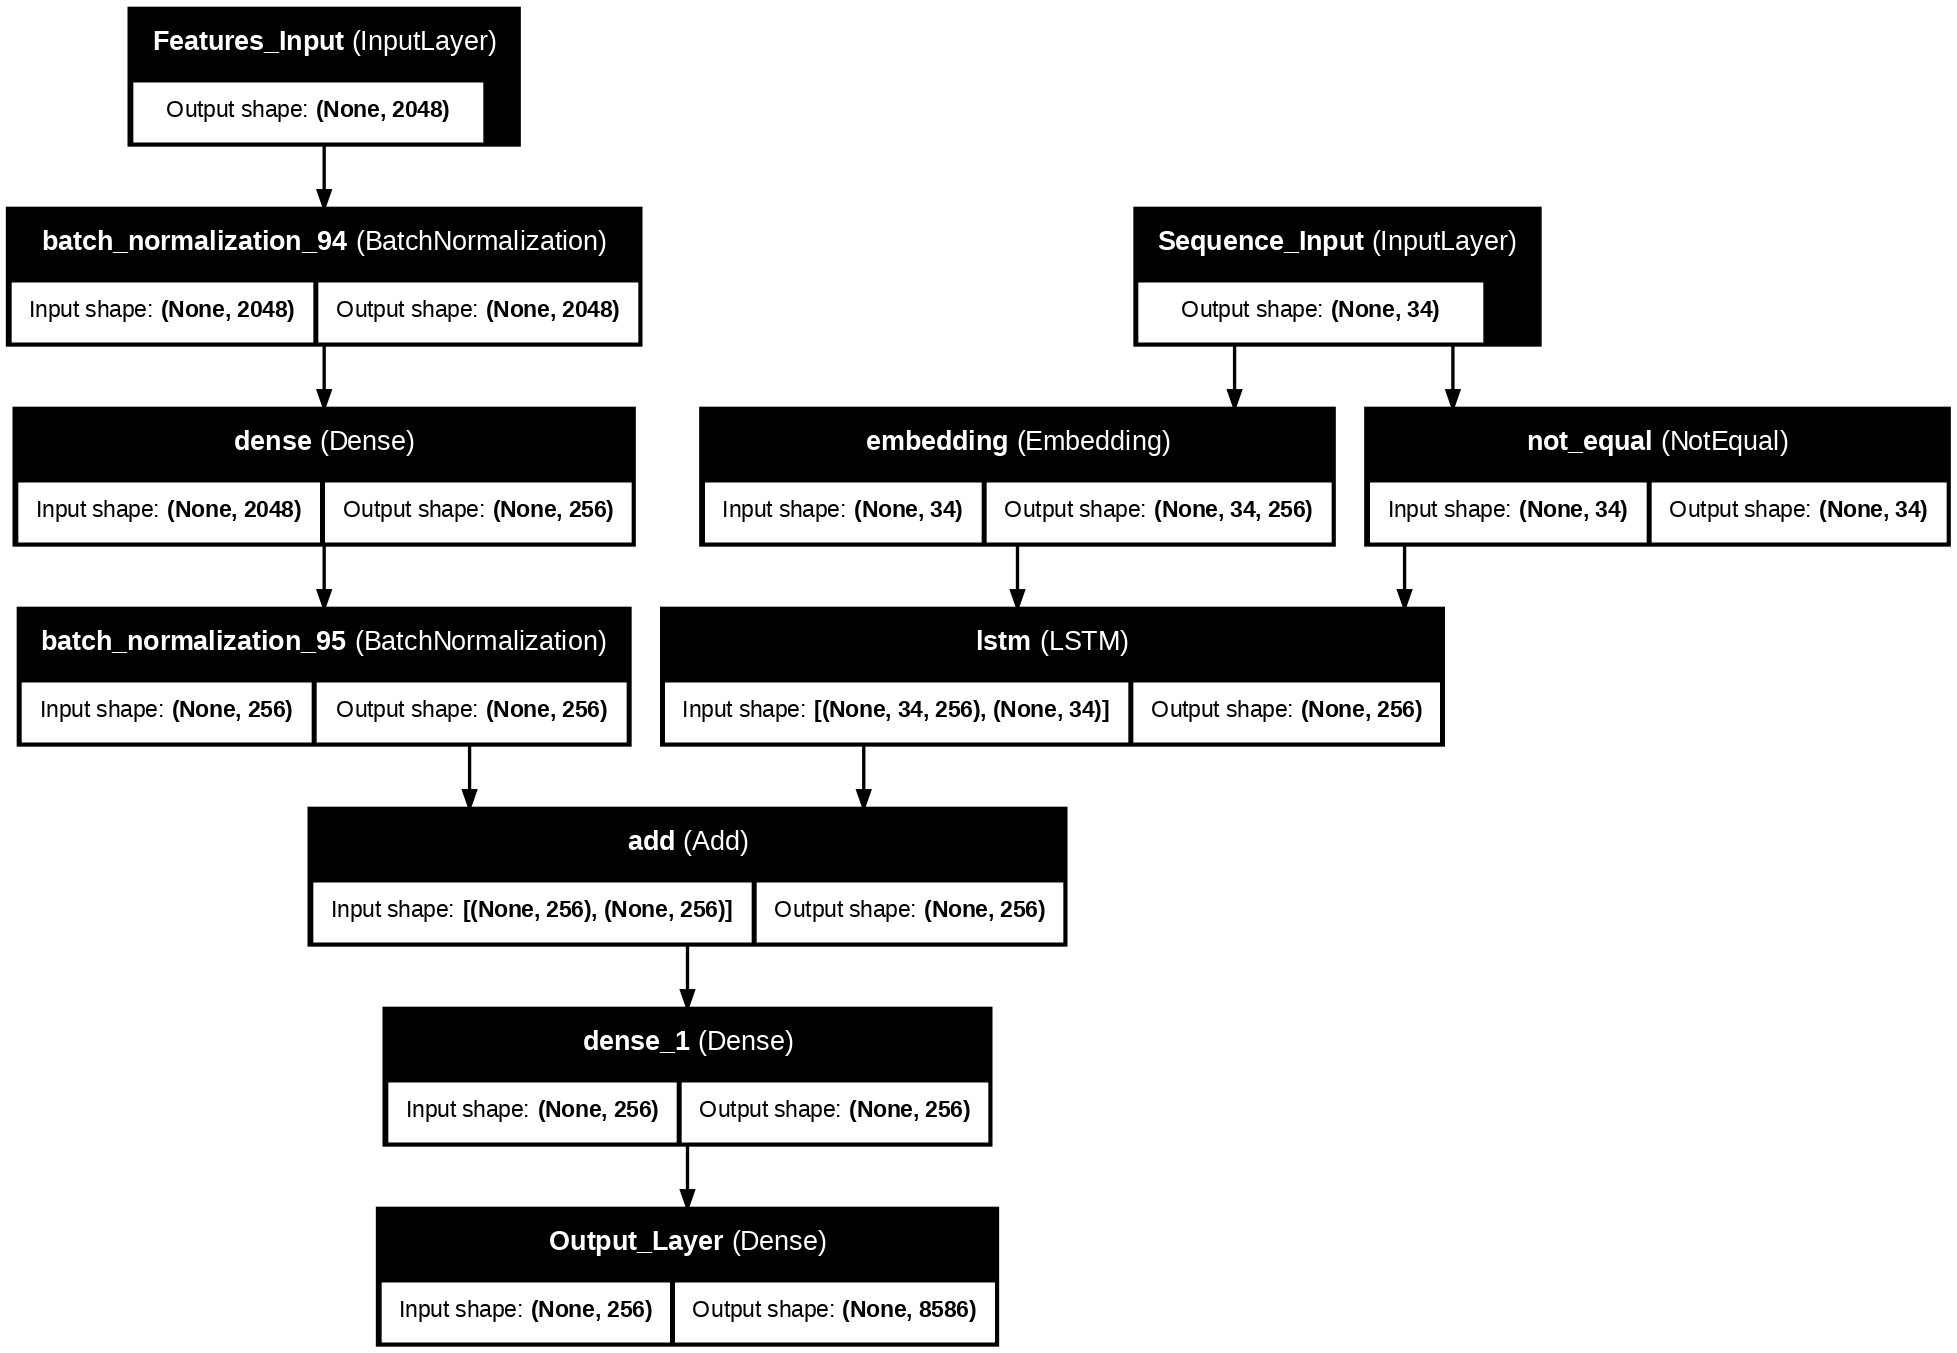

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(caption_model,
           show_shapes=True,
           show_layer_names=True,
           expand_nested=True,
           dpi=120)


## Training the Model with Early Stopping and Learning Rate Scheduling

We train the model using the Adam optimizer and categorical cross-entropy loss while implementing early stopping to prevent overfitting. A learning rate scheduler is applied to gradually decrease the learning rate over epochs, ensuring stable convergence. The model is trained for up to 15 epochs with validation monitoring

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

def lr_scheduler(epoch, lr):
    return float(lr * tf.math.exp(-0.6))

lr_schedule = LearningRateScheduler(lr_scheduler)

history = caption_model.fit(train_data_generator, steps_per_epoch=len(train_captions) // batch_size_train,
                        validation_data=val_data_generator, validation_steps=len(val_captions) // batch_size_val,
                        epochs=15, callbacks=[early_stopping, lr_schedule])


Epoch 1/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 65s 460ms/step - loss: 5.2188 - val_loss: 3.7165 - learning_rate: 0.0055
Epoch 2/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 58s 462ms/step - loss: 3.3674 - val_loss: 3.3493 - learning_rate: 0.0030
Epoch 3/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 81s 643ms/step - loss: 2.9642 - val_loss: 3.2331 - learning_rate: 0.0017
Epoch 4/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 81s 642ms/step - loss: 2.7461 - val_loss: 3.2003 - learning_rate: 9.0718e-04
Epoch 5/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 54s 425ms/step - loss: 2.6138 - val_loss: 3.2034 - learning_rate: 4.9787e-04
Epoch 6/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 81s 640ms/step - loss: 2.5331 - val_loss: 3.2033 - learning_rate: 2.7324e-04
Epoch 7/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 82s 645ms/step - loss: 2.4849 - val_loss: 3.2064 - learning_rate: 1.4996e-04


##  Visualizing Training and Validation Loss

We plot the training and validation loss over epochs to analyze the model's learning process. This helps in identifying overfitting and assessing model performance improvements across iterations.

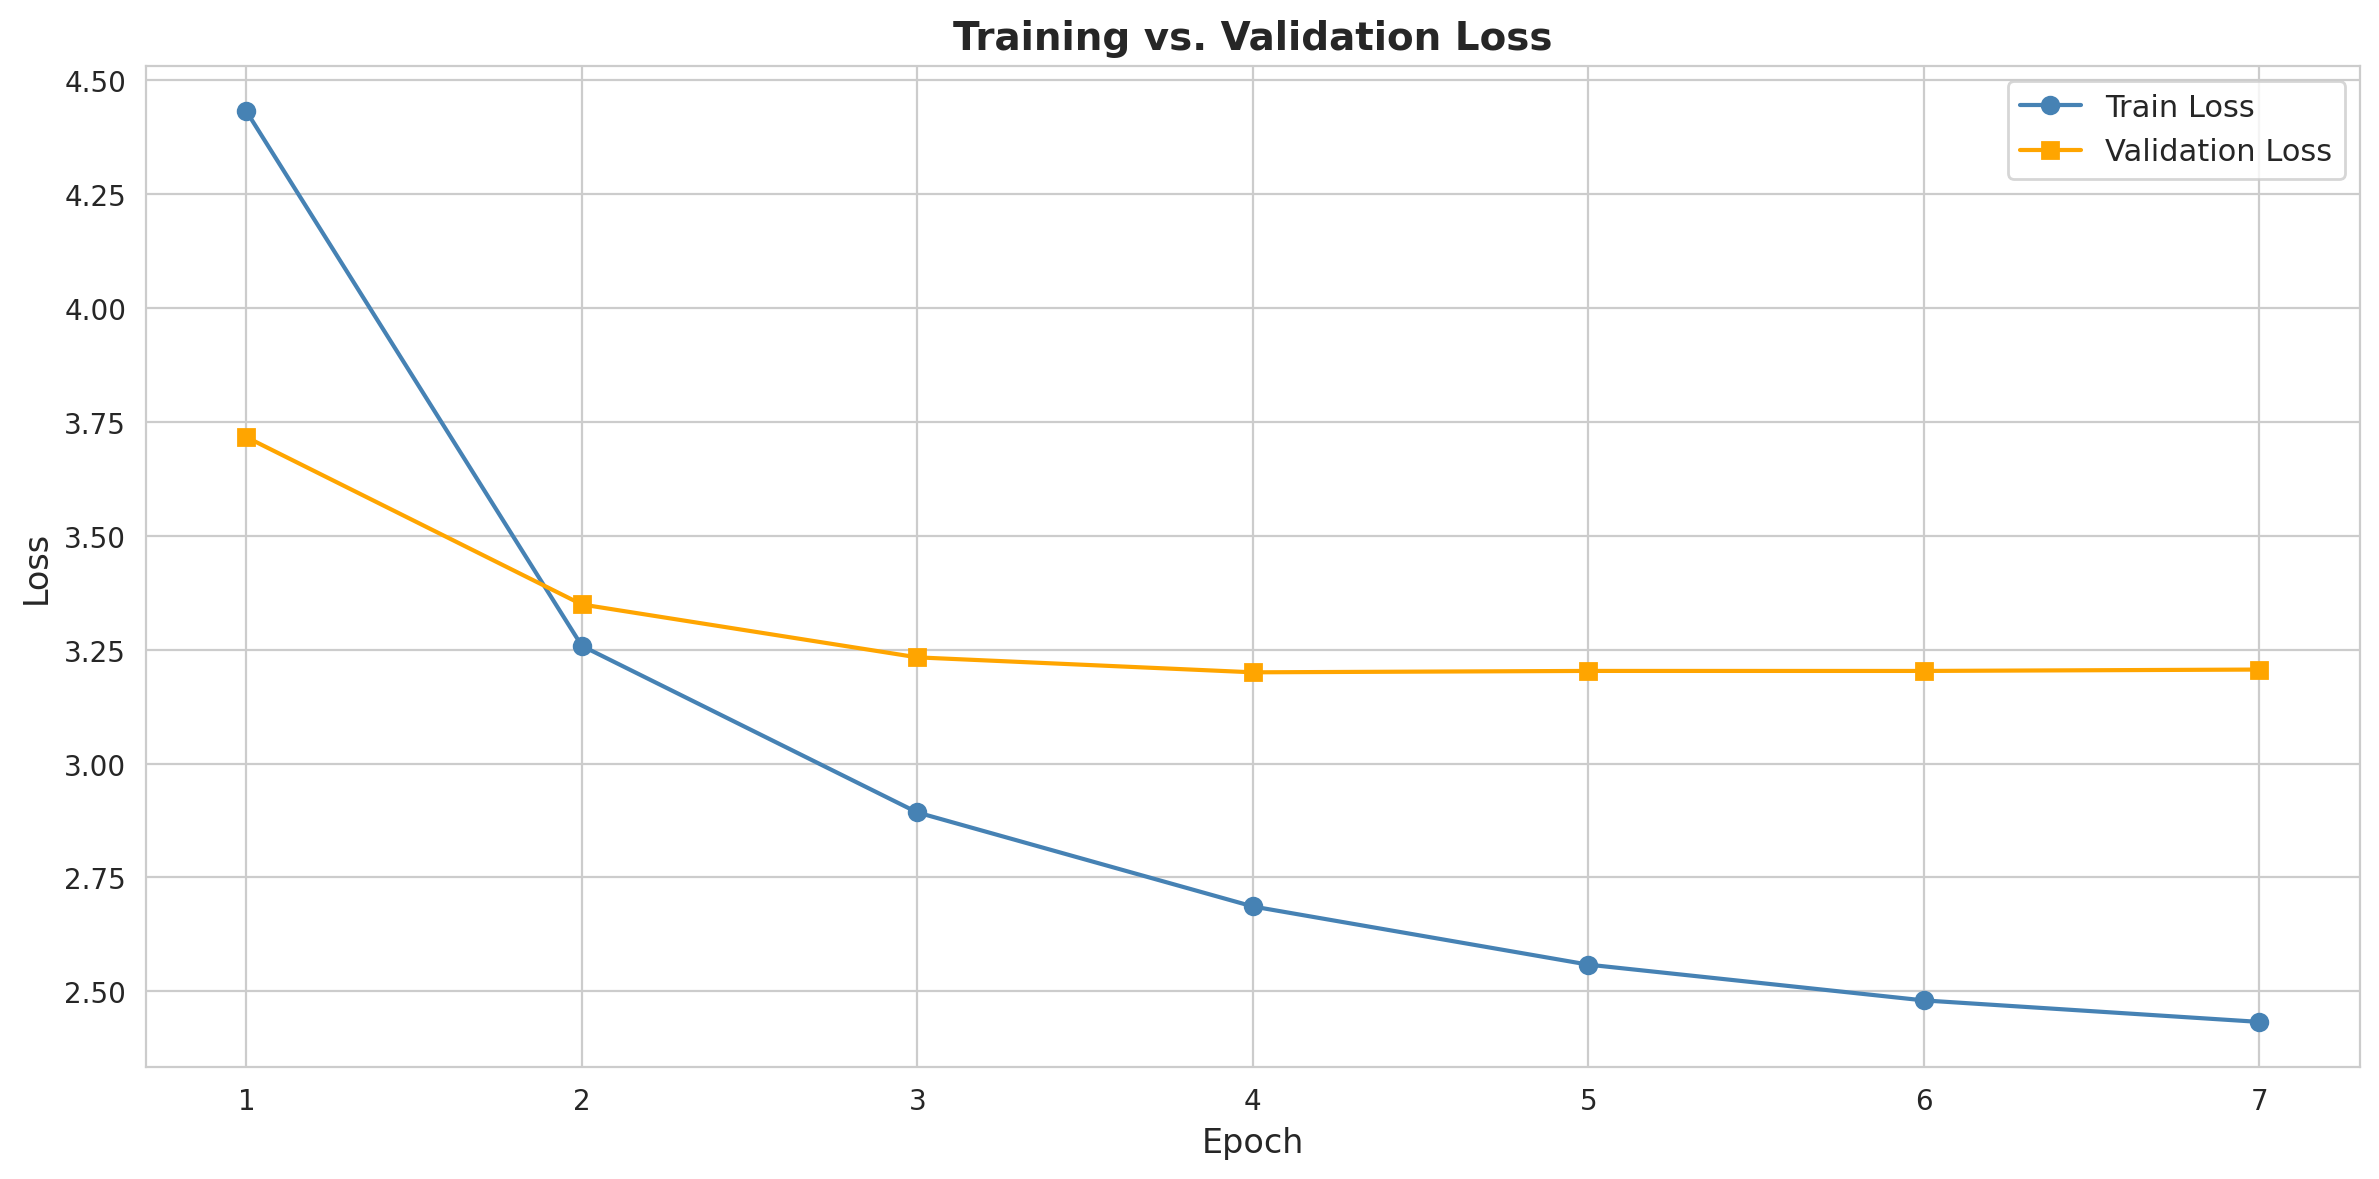

In [ ]:
plt.figure(figsize=(12, 6), dpi=200)
sns.set_style('whitegrid')


plt.plot([x+1 for x in range(len(history.history['loss']))],
         history.history['loss'],
         color='steelblue',
         marker='o',
         label='Train Loss')

plt.plot([x+1 for x in range(len(history.history['val_loss']))],
         history.history['val_loss'],
         color='orange',
         marker='s',
         label='Validation Loss')

plt.title('Training vs. Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=11)
plt.tight_layout()
plt.show()

## Generating Captions Using Greedy Search

We implement a greedy search algorithm to generate captions by predicting one word at a time. The model selects the word with the highest probability at each step until the end token is reached.

In [ ]:
def greedy_generator(image_features):  # A function to generate captions
    in_text = 'start '
    for _ in range(max_caption_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_caption_length, padding='post')

        prediction = caption_model.predict(
            [image_features.reshape(1, cnn_output_dim), sequence],
            verbose=0
        )
        idx = np.argmax(prediction)
        word = tokenizer.index_word.get(idx, '')
        in_text += ' ' + word
        if word == 'end':
            break

    # Clean up tokens
    in_text = in_text.replace('start ', '').replace(' end', '')
    return in_text.strip()

The **greedy_generator** function generates a caption for a given image using a greedy search strategy. Starting with the special token 'start', it repeatedly predicts the next word in the sequence by selecting the word with the highest probability (argmax) from the model’s output. This process continues, appending one word at a time, until the maximum caption length is reached or the special token 'end' is predicted. The resulting sequence is then cleaned by removing the start and end tokens, returning the final caption as a readable sentence.

## Generating Captions Using Beam Search

We implement beam search to generate captions by exploring multiple possible sequences at each step. This method selects the top K probable sequences.

In [ ]:
def beam_search_generator(image_features, K_beams=3, log=False):
    start = [tokenizer.word_index['start']]
    start_word = [[start, 0.0]]

    for _ in range(max_caption_length):
        temp = []
        for s in start_word:
            sequence = pad_sequences([s[0]], maxlen=max_caption_length, padding='post')
            preds = caption_model.predict([image_features.reshape(1, cnn_output_dim), sequence], verbose=0)
            word_preds = np.argsort(preds[0])[-K_beams:]

            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += np.log(preds[0][w]) if log else preds[0][w]
                temp.append([next_cap, prob])

        start_word = sorted(temp, key=lambda x: x[1])[-K_beams:]

    final_ids = start_word[-1][0]
    captions_ = [tokenizer.index_word[i] for i in final_ids]

    final_caption = []
    for word in captions_:
        if word == 'end':
            break
        final_caption.append(word)

    return ' '.join(final_caption[1:])  # Remove start token


The **beam_search_generator** function generates image captions using the beam search decoding strategy. Unlike greedy search, which selects only the most probable word at each step, beam search keeps track of the top K most probable partial sequences (called beams). For each step in the caption, the model predicts multiple candidate words, expands all current beams by appending these candidates, and retains the K best-scoring sequences based on their cumulative probability. This allows the model to explore a wider space of possible captions and increases the chance of generating a more coherent and meaningful sentence. The function then returns the best final caption after removing the 'start' and 'end' tokens.

## BLEU Score

It Computes the BLEU (Bilingual Evaluation Understudy) score a metric for evaluating the quality of text translations by comparing them to one or more reference translations.

In [ ]:
from nltk.translate.bleu_score import corpus_bleu

def BLEU_score(actual, greedy, beam_search):
    # Tokenize the strings into lists of words
    actual_tokenized = [[ref.split() for ref in actual]]
    greedy_tokenized = [greedy[0].split()]
    beam_tokenized = [beam_search[0].split()]

    score_greedy_1 = corpus_bleu(actual_tokenized, greedy_tokenized, weights=(0.3, 0.3, 0.3, 0))
    score_greedy_2 = corpus_bleu(actual_tokenized, greedy_tokenized, weights=(0.25, 0.25, 0.25, 0.25))
    score_BS_1 = corpus_bleu(actual_tokenized, beam_tokenized, weights=(0.3, 0.3, 0.3, 0))
    score_BS_2 = corpus_bleu(actual_tokenized, beam_tokenized, weights=(0.25, 0.25, 0.25, 0.25))

    return [
        f'BLEU-2 Greedy: {round(score_greedy_2, 5)}',
        f'BLEU-1 Greedy: {round(score_greedy_1, 5)}',
        f'Greedy: {greedy[0]}',
        f'BLEU-2 Beam Search: {round(score_BS_2, 5)}',
        f'BLEU-1 Beam Search: {round(score_BS_1, 5)}',
        f'Beam Search:  {beam_search[0]}'
    ]


The **BLEU_score** function evaluates the quality of captions generated by the greedy and beam search methods using the BLEU (Bilingual Evaluation Understudy) metric. It compares each generated caption to reference (ground-truth) captions by computing BLEU-1 and BLEU-2 scores, which assess n-gram overlap (unigrams and bigrams). Higher scores indicate better alignment with the reference captions. This function outputs the BLEU scores alongside the actual generated captions for both decoding strategies, helping to compare their performance.

## Generating Captions for Test Images

We generate captions for all test images using the greedy search method.

In [ ]:
# A dictionary to access actual captions of each image by its ID
test_actual_captions = {}
for item in test_captions:
    image_id, caption = item.split('\t')
    if image_id not in test_actual_captions:
        test_actual_captions[image_id] = []
    test_actual_captions[image_id].append(caption)

In [ ]:
# Generating captions
generated_captions = {}

pbar = tqdm_notebook(total=len(test_image_features), position=0, leave=True, colour='green')
for image_id in test_image_features:
    cap = greedy_generator(test_image_features[image_id])
    generated_captions[image_id] = cap
    pbar.update(1)

pbar.close()

  0%|          | 0/122 [00:00<?, ?it/s]

## Visualizing Caption Generation Results

We randomly select images from the test set and display them alongside their actual captions, greedy search-generated captions and beam search-generated captions. The BLEU score evaluator is used to assess the quality of the generated captions.

In [ ]:
def visualization(data, greedy_caps, beamS_generator, evaluator, num_of_images):
    keys = list(data.keys()) # List of all test images
    images = [np.random.choice(keys) for i in range(num_of_images)] # Randomly selected images

    count = 1
    fig = plt.figure(figsize=(6,20))
    for filename in images:
        actual_cap = data[filename]
        actual_cap = [x.replace("start ", "") for x in actual_cap] # Removing the start token
        actual_cap = [x.replace(" end", "") for x in actual_cap] # Removing the end token

        # Generating captions
        greedy_cap = greedy_caps[filename]
        beamS_cap = beamS_generator(test_image_features[filename])

        # Getting the bleu score
        caps_with_score = evaluator(actual_cap, [greedy_cap]*(len(actual_cap)), [beamS_cap]*(len(actual_cap)))

        image_load = load_img(images_directory+filename, target_size=(199,199,3))
        ax = fig.add_subplot(num_of_images,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        ax = fig.add_subplot(num_of_images,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(caps_with_score))
        for i, text in enumerate(caps_with_score):
            ax.text(0,i,text,fontsize=10)
        count += 1
    plt.show()

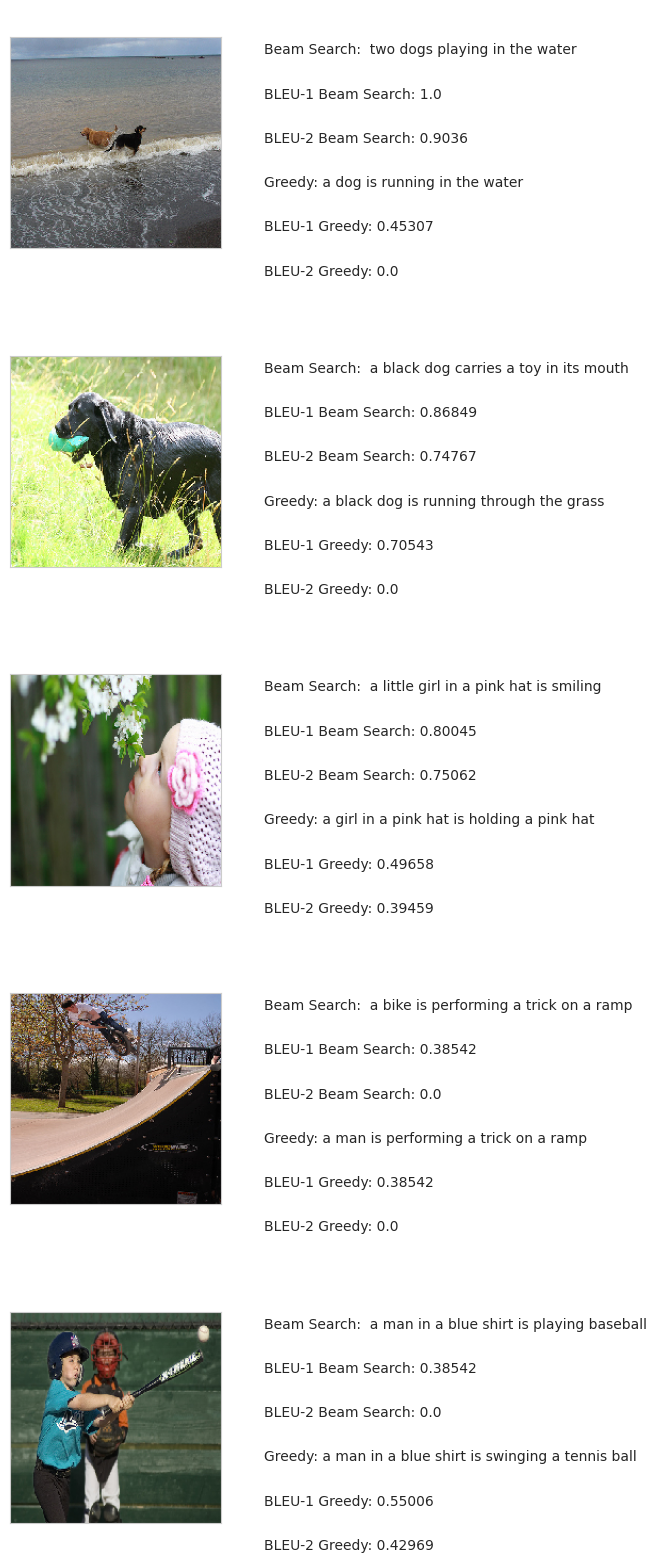

In [ ]:
visualization(test_actual_captions, generated_captions, beam_search_generator, BLEU_score, 5)

## Analysis of Results

- Beam Search outperforms Greedy decoding in most cases, producing captions with higher BLEU-1 and BLEU-2 scores. It generates more accurate and context-aware sentences by exploring multiple possibilities.

- BLEU = 1.0 means a perfect match with the reference caption, while BLEU = 0.0 indicates no word overlap, which may happen even if the caption is reasonable but phrased differently.

- The CNN + LSTM architecture performs well overall but has limitations. Some test images are poorly captioned, showing that the model may misinterpret scenes or lack contextual depth.

## **Conclusion and Reflections**
- While the CNN + LSTM model shows promising results in generating relevant image captions, several observations can be made. The model tends to perform well on simpler scenes but may struggle with more complex or nuanced images, often generating generic or repetitive captions. This can be attributed to limitations in the sequential decoding nature of LSTMs and the inability to capture global context effectively.

- It’s important to note that **InceptionV3** is just one of many powerful feature extractors; alternatives like **ResNet50** or **EfficientNet** could potentially yield different results and improve the quality of image embeddings. Moreover, the CNN + LSTM architecture is only one of several approaches for image captioning—others include attention-based models and transformer-based encoders and decoders.

One key limitation of this implementation is its lack of attention mechanisms and its dependence on fixed-length vector representations of images and sequences. This restricts the model’s ability to focus dynamically on specific parts of the image while generating captions. To address these limitations and improve contextual understanding and fluency, **Transformer architectures**—known for their self-attention mechanisms—offer a more robust and scalable solution. We now move to explore and implement such an architecture in the next part of this notebook.

# Part 2: Image Captioning Using Transformer Architecture

### Overview

After exploring classical recurrent architectures like  LSTMs for image captioning, we turn to a more modern, powerful, and efficient model — the **Transformer**. Introduced by Vaswani et al. in their seminal 2017 paper *“Attention is All You Need”*, transformers have revolutionized natural language processing by enabling highly parallelizable training and superior context modeling.

Transformers rely on self-attention mechanisms to capture long-range dependencies in sequences without the sequential bottlenecks of RNNs. This allows them to process entire sequences simultaneously and focus dynamically on different parts of the input — a capability that promises to greatly improve caption generation quality.

This section demonstrates how to apply a Transformer model for the image captioning task on the Flickr8k dataset.

---

### What is a Transformer?

A Transformer is a deep learning architecture designed specifically for sequential data processing, widely used in NLP tasks such as translation, summarization, and now image captioning. Unlike traditional recurrent networks, transformers eliminate sequential recurrence by using **self-attention mechanisms**, which allow the model to attend to all words in a sequence simultaneously. This results in faster training and improved modeling of contextual relationships.

Key components include:

- **Input Embedding:** Converts words into continuous dense vectors that capture semantic meaning.
- **Positional Encoding:** Adds information about the position of words since the model has no built-in notion of sequence order.
- **Multi-Head Attention:** Enables the model to attend to different parts of the input sequence simultaneously, capturing diverse contextual relationships.
- **Masking:** Prevents the model from attending to future words during training (causal masking) and ignores padding tokens.
- **Cross-Attention:** Allows the decoder to attend to the encoder’s output, connecting the image features with the generated captions.

<div align="center">
  <img src="https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1.png" alt="transformer architecture "><br>
  <em>Figure: Transformers architecture</em>
</div>


---

### Methodology and Main Steps

| Step | Description |
|-------|-------------|
| **1. Data Preparation** | Normalize and tokenize captions, filter by length, and split the Flickr8k dataset. Images are decoded and resized; data pipelines use TensorFlow’s optimized functions for batching and prefetching. |
| **2. Feature Extraction** | Use a pre-trained CNN (e.g., EfficientNetB0) to extract image features, followed by normalization and dense layers to prepare features for the transformer encoder. |
| **3. Transformer Encoder** | Processes the image features through multi-head self-attention and layer normalization layers to create a rich encoded representation of the image. |
| **4. Transformer Decoder** | Takes the input caption sequences and encoded image features, applying positional encoding, masked self-attention, cross-attention, and feed-forward layers to predict the next word. |
| **5. Training Strategy** | Train the model by feeding images and their associated partial captions, using teacher forcing to minimize prediction loss. Sparse categorical cross-entropy is used as the loss function. |
| **6. Caption Generation and Evaluation** | Generate captions using greedy decoding and evaluate performance using BLEU scores to compare with ground-truth captions. |

---

This transformer-based approach addresses several limitations of CNN+LSTM architectures, including better contextual awareness and parallel processing capabilities. In the following cells, we will build and train the transformer model step-by-step, delving into each component with clear explanations.


## Library setup

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
warnings.filterwarnings('ignore')
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import tensorflow as tf
import keras
from keras import layers
from keras.applications import efficientnet
from tensorflow.keras.utils import to_categorical, plot_model
from keras.layers import TextVectorization
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import corpus_bleu
from tqdm import tqdm_notebook
from collections import Counter

## Data import and and Pre-processing

In this step, we prepare the dataset for training the transformer model:

- **Constants and Hyperparameters:** We define key parameters such as image paths, target image size, maximum caption length, vocabulary size, embedding dimensions, batch size, and the number of training epochs.

- **Loading Captions:**

The **load_captions_data** function reads the captions file, which contains image filenames paired with five different captions each.
  - Captions that are too short (< 5 words) or too long (> max sequence length) are filtered out to maintain consistency.
  - Each caption is wrapped with special tokens "start" and "end" to help the model identify the beginning and end of sentences.
  - The function returns a dictionary mapping each image file path to its valid captions, and a list of all filtered captions.

- **Splitting the Dataset:**

The **train_val_split** function divides the dataset into training, validation, and test sets with default splits of 75% training, 20% validation, and 5% test.
The split is performed on the unique image keys, ensuring all captions of an image belong to the same subset.

- **Output:**
After loading and splitting, we print the total number of images and how many are allocated to training, validation, and test sets, providing an overview of dataset distribution.

This step ensures that both images and captions are clean, standardized, and correctly partitioned for the training pipeline.

In [ ]:
# Path to the images
IMAGES_PATH = "/kaggle/flickr8k/Images"
# Path to the captions
CAPTIONS_PATH = "/kaggle/flickr8k/captions.txt"

In [ ]:
# Desired image dimensions
IMAGE_SIZE = (299, 299)

# Fixed length allowed for any sequence
SEQ_LENGTH = 25

# Vocabulary size
VOCAB_SIZE = 10000

# Dimension for the image embeddings and token embeddings
EMBED_DIM = 512

# Per-layer units in the feed-forward network
FF_DIM = 512

# Batch size
BATCH_SIZE = 512

# Number of epochs
EPOCHS = 30

In [ ]:
# Loads captions (text) data and maps them to corresponding images.
def load_captions_data(filename):
    with open(filename) as caption_file:
        caption_data = caption_file.readlines()[1:]
        caption_mapping = {}
        text_data = []
        images_to_skip = set()

        for line in caption_data:
            line = line.rstrip("\n")
            # Each image is repeated five times for the five different captions.
            # Image name and captions are separated using a comma
            img_name, caption = line.split(",", 1)
            img_name = os.path.join(IMAGES_PATH, img_name.strip())
            # Removing caption that are either too short to too long
            tokens = caption.strip().split()
            if len(tokens) < 5 or len(tokens) > SEQ_LENGTH:
                images_to_skip.add(img_name)
                continue

            if img_name.endswith("jpg") and img_name not in images_to_skip:
                # A start and an end token must be added to each caption
                caption = "<start> " + caption.strip() + " <end>"
                text_data.append(caption)

                if img_name in caption_mapping:
                    caption_mapping[img_name].append(caption)
                else:
                    caption_mapping[img_name] = [caption]

        for img_name in images_to_skip:
            if img_name in caption_mapping:
                del caption_mapping[img_name]

        return caption_mapping, text_data

# Splits the dataset into training, validation, and test sets
def train_val_split(caption_data, validation_size=0.2, test_size=0.05, shuffle=True):
    # Getting the list of all image names
    all_images = list(caption_data.keys())

    # Shuffle if necessary
    if shuffle:
        np.random.shuffle(all_images)

    train_keys, validation_keys = train_test_split(all_images, test_size=validation_size, random_state=42)
    validation_keys, test_keys = train_test_split(validation_keys, test_size=test_size, random_state=42)

    training_data = {img_name: caption_data[img_name] for img_name in train_keys}
    validation_data = {img_name: caption_data[img_name] for img_name in validation_keys}
    test_data = {img_name: caption_data[img_name] for img_name in test_keys}

    # Return the splits
    return training_data, validation_data, test_data

# Loading the dataset
captions_mapping, text_data = load_captions_data(CAPTIONS_PATH)

# Spliting the dataset
train_data, validation_data, test_data = train_val_split(captions_mapping)
print(f"Total number of samples: {len(captions_mapping)}")
print(f"----> Number of training samples: {len(train_data)}")
print(f"----> Number of validation samples: {len(validation_data)}")
print(f"----> Number of test samples: {len(test_data)}")

Total number of samples: 7643
----> Number of training samples: 6114
----> Number of validation samples: 1452
----> Number of test samples: 77


## Defining **the vectorizer** with custom standardization and image augmentation

In this step, we prepare both textual and image inputs for the transformer model:

- **Text Vectorization with Custom Standardization**

- We define a custom_standardization function to clean and normalize the text:

  - Converts all characters to lowercase
  - Removes punctuation and numerical characters using regular expressions.

- A TextVectorization layer is then configured to:
  - Limit the vocabulary to the top VOCAB_SIZE most frequent tokens.
  - Convert each caption into a fixed-length sequence of integers (SEQ_LENGTH), padding shorter ones.
  - Apply the custom standardization function before tokenization.

- Finally, the vectorizer is adapted to the training captions so it learns the vocabulary based on the dataset.

- Image Augmentation
We use a simple augmentation pipeline built with keras.Sequential, applying:
  - Random horizontal flip
  - Random rotation
  - Random contrast adjustment

These augmentations introduce variation during training, which helps improve the model’s generalization ability on unseen data.

- Final Text Cleanup
The text data is then re-standardized using **custom_standardization**, and TensorFlow tensors are converted back into Python strings for further use.

This step ensures the text is clean and numeric, and the images are varied enough to prevent overfitting during training.

In [ ]:
def custom_standardization(input_string):
    # Lowercasing all of the captions
    lowercase = tf.strings.lower(input_string)
    # Charecters to remove
    strip_chars = "!\"#$%&'()*+,-./:;=?@[\]^_`{|}~1234567890"
    return tf.strings.regex_replace(lowercase, "[%s]" % re.escape(strip_chars), "")

# Defining the vectorizer
vectorization = TextVectorization(
    # Number of unique tokens
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    # Maximum length of captions. Padding tokens(zeros) will be added to shorter captions.
    output_sequence_length=SEQ_LENGTH,
    # Standardizing the captions
    standardize=custom_standardization)

# Adapting the vectorizer with the captions
vectorization.adapt(text_data)

# Data augmentation for image data
image_augmentation = keras.Sequential([layers.RandomFlip("horizontal"),
                                       layers.RandomRotation(0.2),
                                       layers.RandomContrast(0.3)])

# Standardizing the text data
text_data = list(map(lambda x: str(custom_standardization(x).numpy())[2:-1], text_data))

## Visualizing some of the images along with the corresponding captions

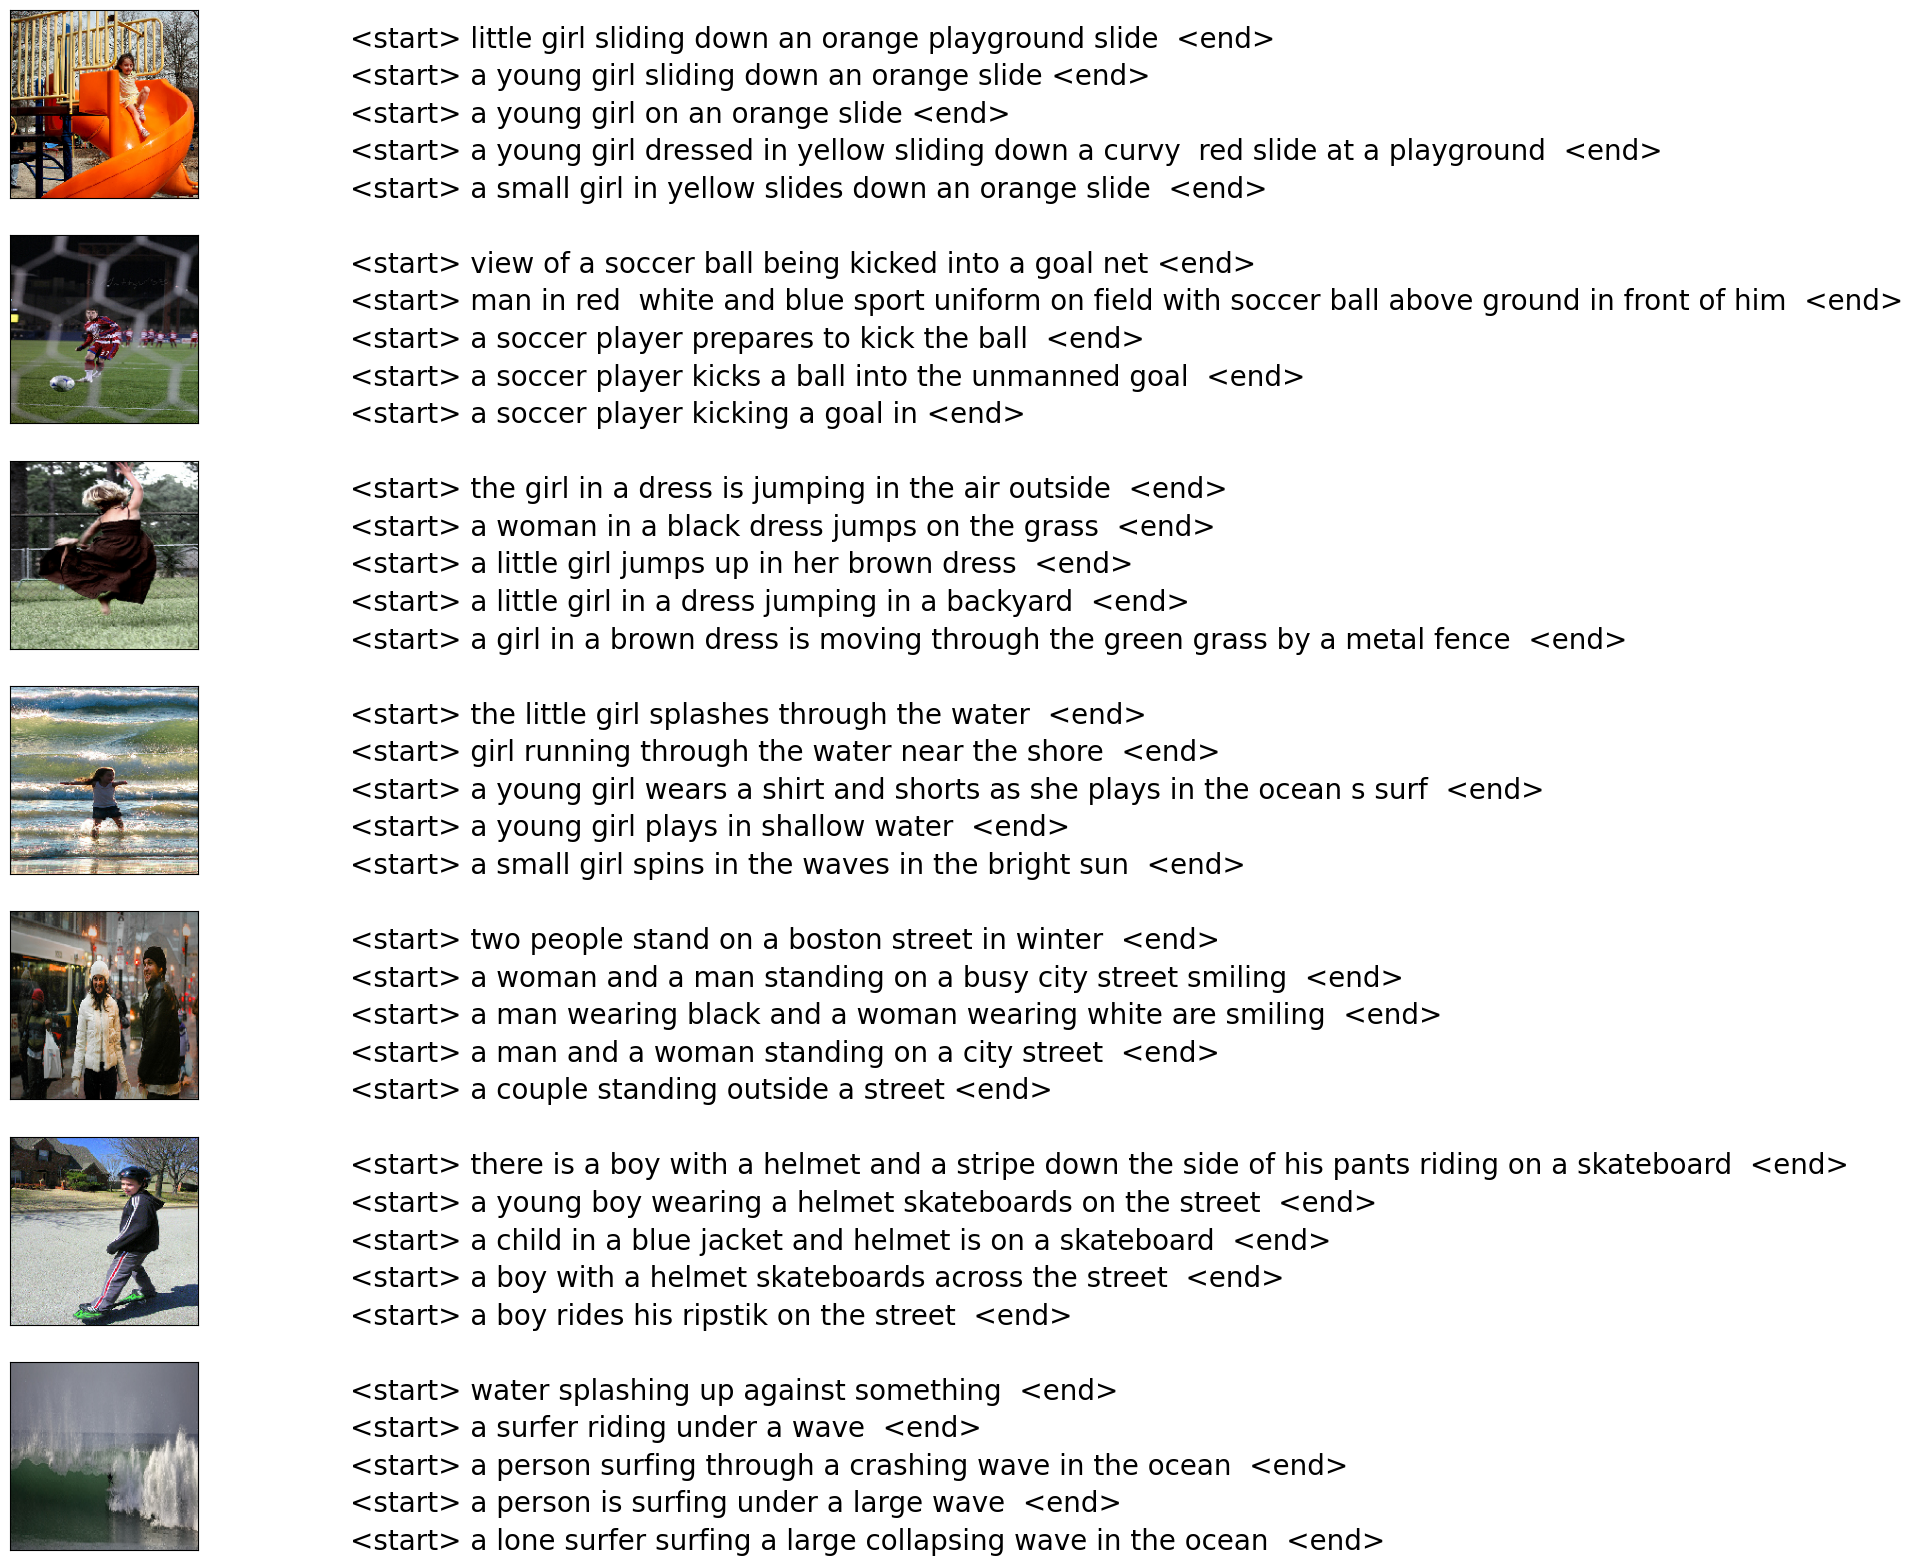

In [ ]:
def visualaization(data, num_of_images):
    count = 1
    fig = plt.figure(figsize=(10,20))
    for filename in list(data.keys())[100:100+num_of_images]:
        captions = list(map(lambda x: str(custom_standardization(x).numpy())[2:-1], data[filename]))
        image_load = load_img(filename, target_size=(199,199,3))

        ax = fig.add_subplot(num_of_images,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        ax = fig.add_subplot(num_of_images,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(captions))
        for i, caption in enumerate(captions):
            ax.text(0,i,caption,fontsize=20)
        count += 1
    plt.show()

visualaization(train_data, 7)

## Exploring the Caption Length Distribution

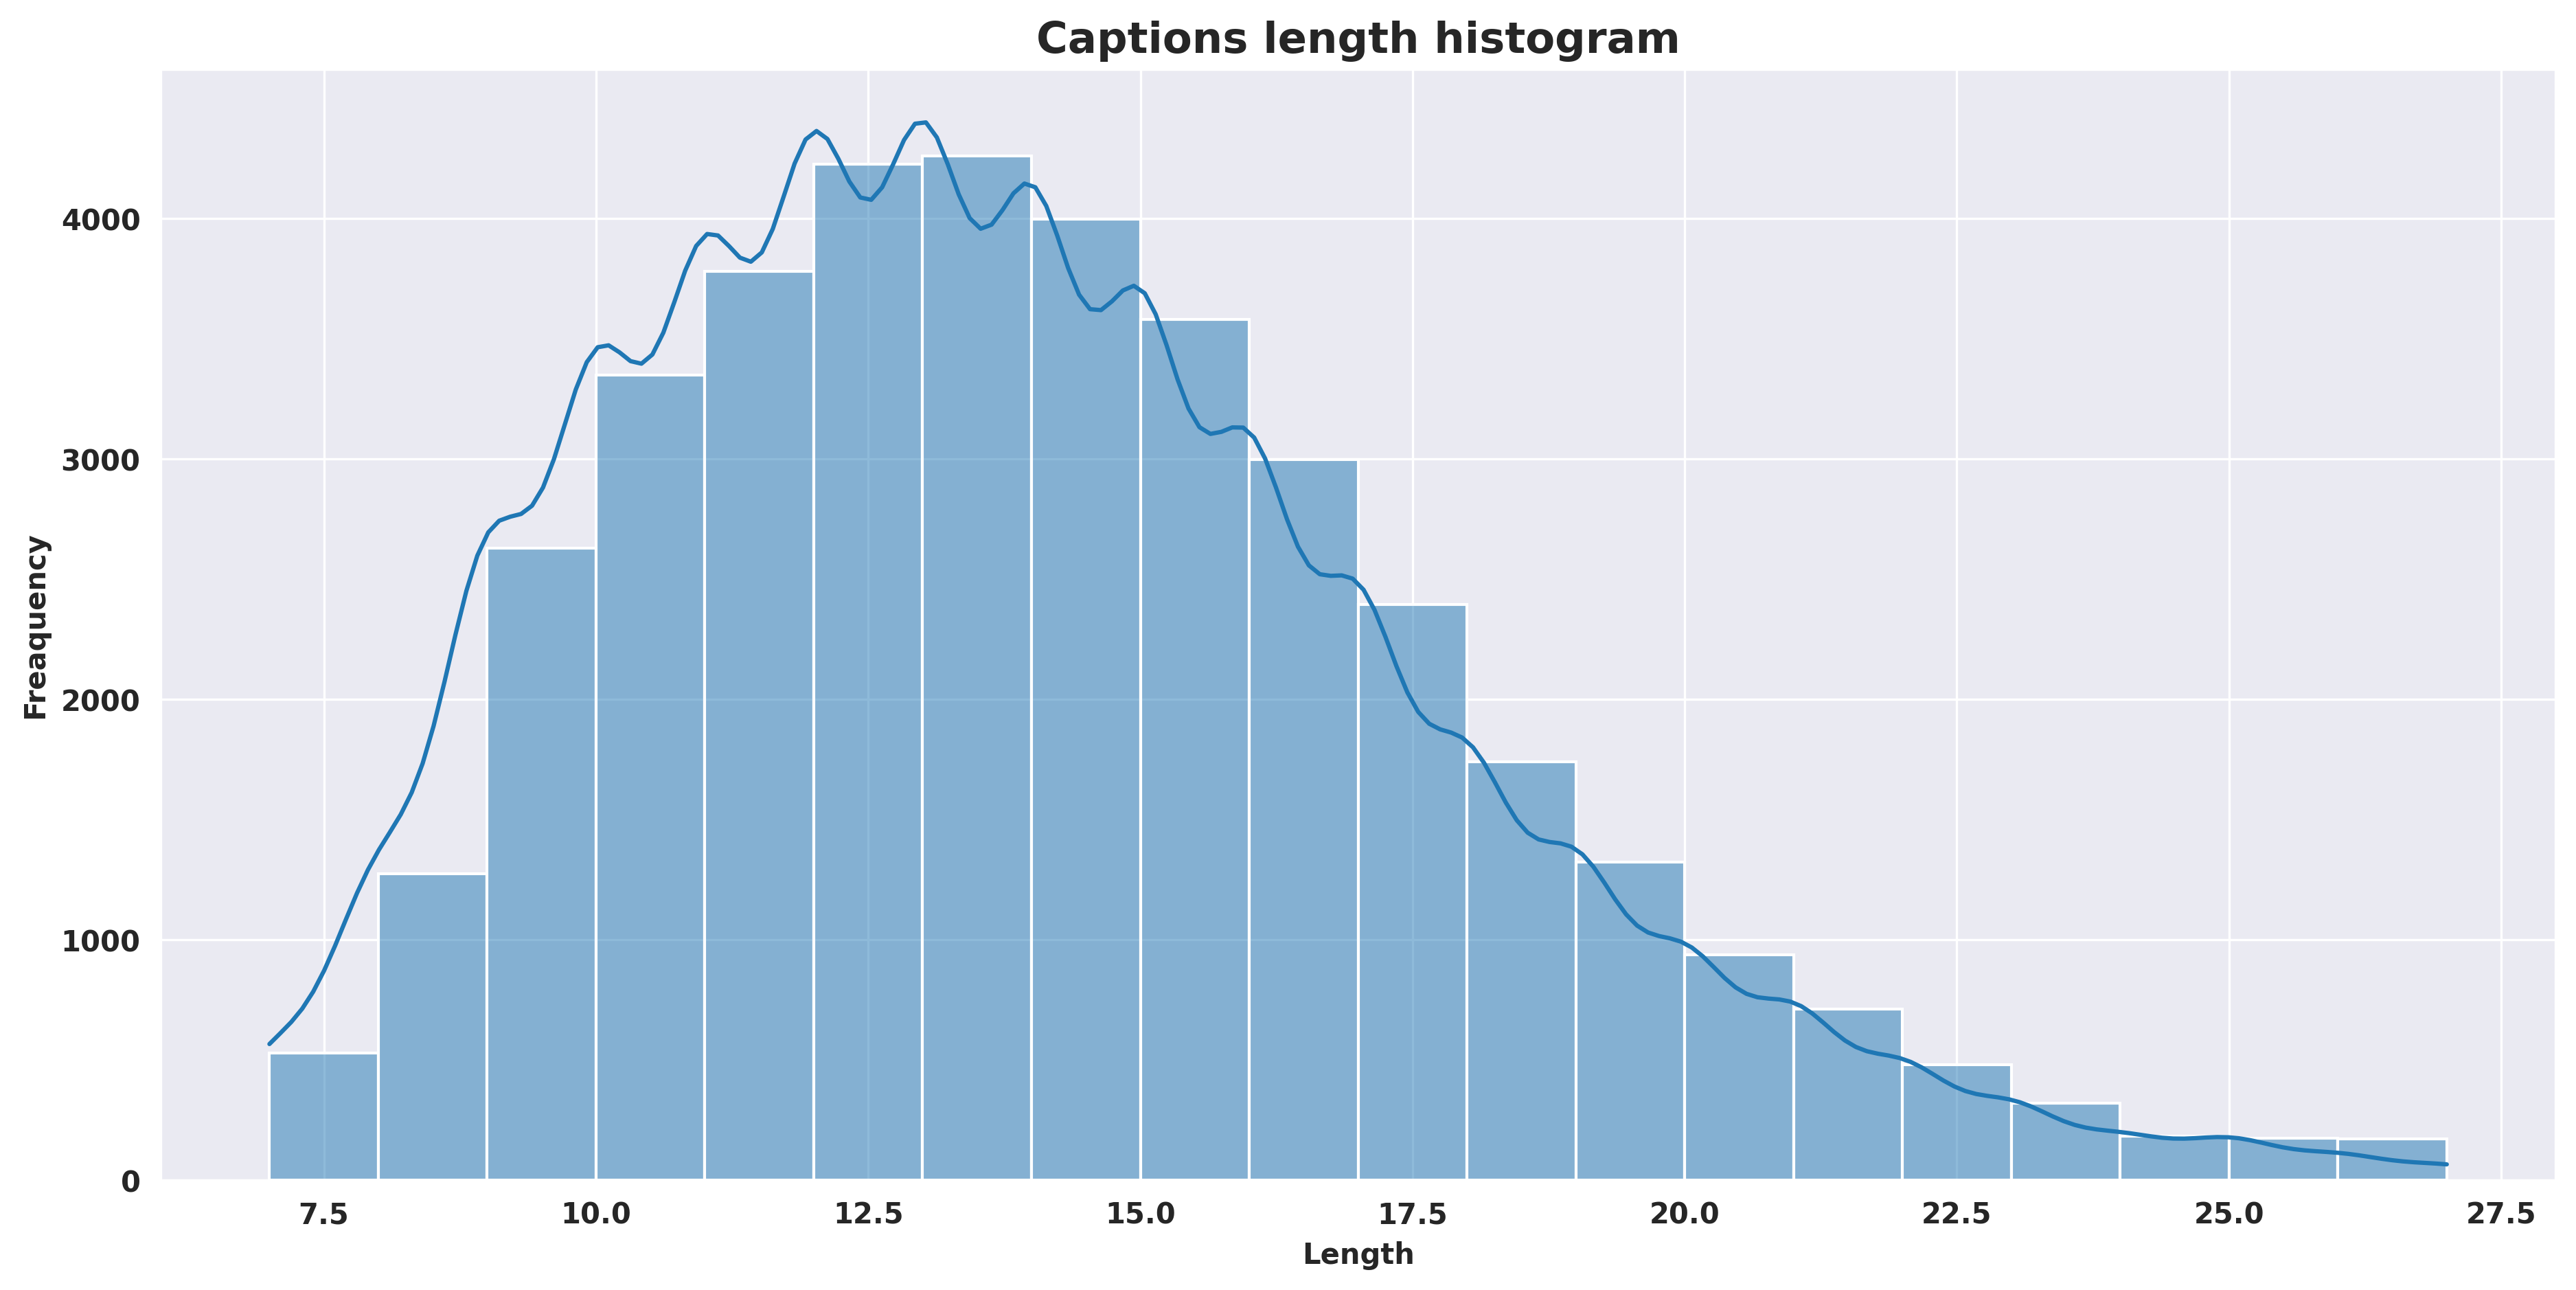

In [ ]:
def captions_length(data):
    plt.figure(figsize=(15, 7), dpi=300)
    sns.set_style('darkgrid')
    sns.histplot(x=[len(x.split(' ')) for x in data], kde=True, binwidth=1)
    plt.title('Captions length histogram', fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.xlabel('Length', fontweight='bold')
    plt.ylabel('Freaquency', fontweight='bold')
    plt.show()

captions_length(text_data)

## **Data Pipeline Setup for Model Input**

In this section, we construct efficient data pipelines for training and validation using the **TensorFlow `tf.data` API**, which supports **parallelization** and **prefetching** to optimize performance.

#### Image Preprocessing

* `decode_and_resize(img_path)`:

  * Loads an image from a file path.
  * Decodes the JPEG-encoded image.
  * Resizes it to the target shape `IMAGE_SIZE = (299, 299)`.
  * Converts the image to float32 format scaled between \[0, 1].

#### Pairing Images with Captions

* `process_input(img_path, captions)`:

  * Applies the image preprocessing pipeline to the image.
  * Applies the vectorization layer to transform captions into padded integer sequences.

#### Creating TensorFlow Datasets

* `make_dataset(images, captions)`:

  * Uses `tf.data.Dataset.from_tensor_slices` to pair images and captions.
  * Applies **shuffling** to avoid learning bias.
  * Maps the image-caption pairs through the preprocessing pipeline using `map()`.
  * Applies **batching** and **prefetching** to ensure efficient memory and parallel CPU/GPU usage.

> We use `tf.data.AUTOTUNE` to let TensorFlow **automatically determine** the optimal level of parallelism for preprocessing and loading operations.

Finally, the pipeline is instantiated for both training and validation sets:

```python
train_dataset = make_dataset(...)
validation_dataset = make_dataset(...)
```




In [ ]:
# Processes the images
def decode_and_resize(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMAGE_SIZE)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img


def process_input(img_path, captions):
    # Processed images: (None, 299, 299, 3), Vectorized captions: (None, None, 25)
    return decode_and_resize(img_path), vectorization(captions)

# Prepares the dataset
def make_dataset(images, captions):
    dataset = tf.data.Dataset.from_tensor_slices((images, captions))
    dataset = dataset.shuffle(BATCH_SIZE * 8)
    dataset = dataset.map(process_input, num_parallel_calls=tf.data.AUTOTUNE)
    # Prefetching the next batch of data based on available resources while the current batch is being processed.
    dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    return dataset


# Making the datasets by passing the list of images and the list of corresponding captions
train_dataset = make_dataset(list(train_data.keys()), list(train_data.values()))
validation_dataset = make_dataset(list(validation_data.keys()), list(validation_data.values()))

## Defining the Image Captioning Model (Transformer-Based)

> ### **CNN** (feature extraction)
- EfficientNetB0 (pre-trained on - ImageNet) is used as the feature extractor.
- Removes the classification head (include_top=False) and reshapes the output to match the input format for the encoder.
- The CNN is frozen to retain pre-trained visual knowledge.

> ### **Encoder** (embedded image features)
- Applies Layer Normalization and a Dense layer to the reshaped CNN features.
- Uses a Multi-Head Self-Attention Layer to capture dependencies across the image grid.
- Outputs a sequence of embedded visual features.

> ### **Decoder** (Transformer Decoder Block)
- Accepts tokenized and embedded captions.
- Uses Positional Embedding to retain word order.
- Applies a causal attention mask to prevent attending to future tokens.

>- Incorporates:
  - Multi-Head Self-Attention over the caption.
  - Multi-Head Cross-Attention over encoder outputs (image features).
  - Feed-Forward layers and Layer Normalization at every sub-layer.

> ### **Output**
Outputs prediction logits over the vocabulary using a Dense + Softmax layer.

<div align="center">
  <img src="https://ars.els-cdn.com/content/image/1-s2.0-S131915782300304X-gr1.jpg" alt="Image captioning with transformers"><br>
  <em>Figure: Image captioning with transformers</em>
</div>

In [ ]:
def get_cnn_model():
    base_model = efficientnet.EfficientNetB0(
        input_shape=(*IMAGE_SIZE, 3),
        include_top=False, # Removing the prediction layers
        weights="imagenet")
    # Freezing the model's weights
    base_model.trainable = False
    base_model_out = base_model.output
    base_model_out = layers.Reshape((-1, base_model_out.shape[-1]))(base_model_out)
    cnn_model = keras.models.Model(base_model.input, base_model_out)
    return cnn_model


class TransformerEncoderBlock(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, dropout=0.0)
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.dense_1 = layers.Dense(embed_dim, activation="relu")

    def call(self, inputs, training, mask=None):
        inputs = self.layernorm_1(inputs)
        inputs = self.dense_1(inputs)
        attention_output_1 = self.attention_1(query=inputs,
                                              value=inputs,
                                              key=inputs,
                                              attention_mask=None,
                                              training=training)
        out_1 = self.layernorm_2(inputs + attention_output_1)
        return out_1


class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.position_embeddings = layers.Embedding(input_dim=sequence_length, output_dim=embed_dim)
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.embed_scale = tf.math.sqrt(tf.cast(embed_dim, tf.float32))

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1) # Positional encoding
        embedded_tokens = self.token_embeddings(inputs) # Input embedding
        embedded_tokens = embedded_tokens * self.embed_scale
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions # Positional embedding

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)


class TransformerDecoderBlock(layers.Layer):
    def __init__(self, embed_dim, ff_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.ff_dim = ff_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, dropout=0.1)
        self.cross_attention_2 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, dropout=0.1)
        self.ffn_layer_1 = layers.Dense(ff_dim, activation="relu")
        self.ffn_layer_2 = layers.Dense(embed_dim)

        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()

        self.embedding = PositionalEmbedding(embed_dim=EMBED_DIM,
                                             sequence_length=SEQ_LENGTH,
                                             vocab_size=VOCAB_SIZE,)
        self.out = layers.Dense(VOCAB_SIZE, activation="softmax")

        self.dropout_1 = layers.Dropout(0.3)
        self.dropout_2 = layers.Dropout(0.5)
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, training, mask=None):
        inputs = self.embedding(inputs)
        causal_mask = self.get_causal_attention_mask(inputs)

        # If the mask is not None, it means that padding tokens are present in the input sequence.
        if mask is not None:
            padding_mask = tf.cast(mask[:, :, tf.newaxis], dtype=tf.int32)
            combined_mask = tf.cast(mask[:, tf.newaxis, :], dtype=tf.int32)
            # Masking both padding tokens and future tokens
            combined_mask = tf.minimum(combined_mask, causal_mask)

        attention_output_1 = self.attention_1(query=inputs,
                                              value=inputs,
                                              key=inputs,
                                              attention_mask=combined_mask,
                                              training=training)
        out_1 = self.layernorm_1(inputs + attention_output_1)

        # Note that the lengths of the inputs are different and cross-attention handles that.
        cross_attention_output_2 = self.cross_attention_2(query=out_1,
                                              value=encoder_outputs,
                                              key=encoder_outputs,
                                              attention_mask=padding_mask,
                                              training=training)
        out_2 = self.layernorm_2(out_1 + cross_attention_output_2)

        ffn_out = self.ffn_layer_1(out_2)
        ffn_out = self.dropout_1(ffn_out, training=training)
        ffn_out = self.ffn_layer_2(ffn_out)

        ffn_out = self.layernorm_3(ffn_out + out_2, training=training)
        ffn_out = self.dropout_2(ffn_out, training=training)

        preds = self.out(ffn_out)
        return preds

    # Masks future tokens
    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat([tf.expand_dims(batch_size, -1),tf.constant([1, 1], dtype=tf.int32)],axis=0)
        return tf.tile(mask, mult)


class ImageCaptioningModel(keras.Model):
    def __init__(self, cnn_model, encoder, decoder, num_captions_per_image=5, image_aug=None):
        super().__init__()
        self.cnn_model = cnn_model
        self.encoder = encoder
        self.decoder = decoder
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.acc_tracker = keras.metrics.Mean(name="accuracy")
        self.num_captions_per_image = num_captions_per_image
        self.image_aug = image_aug

        print()
        print(f'CNN input shape: {cnn_model.input_shape}')
        print(f'CNN output shape: {cnn_model.output_shape}', end='\n'*2)
        print(f'Encoder input ---> Dense layer shape: {cnn_model.output_shape} ---> (None, {cnn_model.output_shape[1]}, {EMBED_DIM})')
        print(f'Encoder output shape: (None, {cnn_model.output_shape[1]}, {EMBED_DIM})', end='\n'*2)
        print(f'Decoder input 1 (Caption) ---> Positional Embedding shape: (None, {SEQ_LENGTH-1}) ---> (None, {SEQ_LENGTH-1}, {EMBED_DIM})')
        print(f'Decoder input 2 (Embedded image features) shape: (None, {cnn_model.output_shape[1]}, {EMBED_DIM})')
        print(f'Decoder output (MH Cross-Attention) shape: (None, {SEQ_LENGTH-1}, {EMBED_DIM})')
        print(f'Decoder prediction (Dense layer) shape: (None, {SEQ_LENGTH-1}, {VOCAB_SIZE})')


    # Calculates the loss, taking into account a mask to handle padding.
    def calculate_loss(self, y_true, y_pred, mask):
        loss = self.loss(y_true, y_pred)
        mask = tf.cast(mask, dtype=loss.dtype)
        loss *= mask
        return tf.reduce_sum(loss) / tf.reduce_sum(mask)

    # Calculates the accuracy, taking into account a mask to handle padding.
    def calculate_accuracy(self, y_true, y_pred, mask):
        accuracy = tf.equal(y_true, tf.argmax(y_pred, axis=2))
        accuracy = tf.math.logical_and(mask, accuracy)
        accuracy = tf.cast(accuracy, dtype=tf.float32)
        mask = tf.cast(mask, dtype=tf.float32)
        return tf.reduce_sum(accuracy) / tf.reduce_sum(mask)

    def _compute_caption_loss_and_acc(self, img_embed, batch_seq, training=True):
        encoder_out = self.encoder(img_embed, training=training)
        batch_seq_inp = batch_seq[:, :-1]
        batch_seq_true = batch_seq[:, 1:]
        # Creating a binary mask where 1 indicates a valid token, and 0 indicates padding.
        mask = tf.math.not_equal(batch_seq_true, 0)
        batch_seq_pred = self.decoder(batch_seq_inp, encoder_out, training=training, mask=mask)
        loss = self.calculate_loss(batch_seq_true, batch_seq_pred, mask)
        acc = self.calculate_accuracy(batch_seq_true, batch_seq_pred, mask)
        return loss, acc

    # Iterates through each caption for the given image, computes loss and accuracy, updates weights, and trackers.
    def train_step(self, batch_data):
        batch_img, batch_seq = batch_data
        batch_loss = 0
        batch_acc = 0

        # Applies image augmentation if image_aug is provided.
        if self.image_aug:
            batch_img = self.image_aug(batch_img)

        # 1. Get image embeddings
        img_embed = self.cnn_model(batch_img)

        # 2. Pass each of the five captions one by one to the decoder
        # along with the encoder outputs and compute the loss as well as accuracy
        # for each caption.
        for i in range(self.num_captions_per_image):
            with tf.GradientTape() as tape:
                loss, acc = self._compute_caption_loss_and_acc(img_embed, batch_seq[:, i, :], training=True)

                # 3. Update loss and accuracy
                batch_loss += loss
                batch_acc += acc

            # 4. Get the list of all the trainable weights
            train_vars = (self.encoder.trainable_variables + self.decoder.trainable_variables)

            # 5. Get the gradients
            grads = tape.gradient(loss, train_vars)

            # 6. Update the trainable weights
            self.optimizer.apply_gradients(zip(grads, train_vars))

        # 7. Update the trackers
        batch_acc /= float(self.num_captions_per_image)
        self.loss_tracker.update_state(batch_loss)
        self.acc_tracker.update_state(batch_acc)

        # 8. Return the loss and accuracy values
        return {"loss": self.loss_tracker.result(),
                "acc": self.acc_tracker.result()}

    # Similar to train_step but without updating weights.
    def test_step(self, batch_data):
        batch_img, batch_seq = batch_data
        batch_loss = 0
        batch_acc = 0

        # 1. Get image embeddings
        img_embed = self.cnn_model(batch_img)

        # 2. Pass each of the five captions one by one to the decoder
        # along with the encoder outputs and compute the loss as well as accuracy
        # for each caption.
        for i in range(self.num_captions_per_image):
            loss, acc = self._compute_caption_loss_and_acc(img_embed, batch_seq[:, i, :], training=False)

            # 3. Update batch loss and batch accuracy
            batch_loss += loss
            batch_acc += acc

        batch_acc /= float(self.num_captions_per_image)

        # 4. Update the trackers
        self.loss_tracker.update_state(batch_loss)
        self.acc_tracker.update_state(batch_acc)

        # 5. Return the loss and accuracy values
        return {"loss": self.loss_tracker.result(),
                "acc": self.acc_tracker.result()}

    @property
    def metrics(self):
        # We must list the metrics here so the `reset_states()` can be,
                                                  # called automatically.
        return [self.loss_tracker, self.acc_tracker]


cnn_model = get_cnn_model()
encoder = TransformerEncoderBlock(embed_dim=EMBED_DIM, dense_dim=FF_DIM, num_heads=2)
decoder = TransformerDecoderBlock(embed_dim=EMBED_DIM, ff_dim=FF_DIM, num_heads=3)
caption_model = ImageCaptioningModel(cnn_model=cnn_model, encoder=encoder, decoder=decoder, image_aug=image_augmentation)

16705208/16705208 [==============================] - 0s 0us/step

CNN input shape: (None, 299, 299, 3)
CNN output shape: (None, 100, 1280)

Encoder input ---> Dense layer shape: (None, 100, 1280) ---> (None, 100, 512)
Encoder output shape: (None, 100, 512)

Decoder input 1 (Caption) ---> Positional Embedding shape: (None, 24) ---> (None, 24, 512)
Decoder input 2 (Embedded image features) shape: (None, 100, 512)
Decoder output (MH Cross-Attention) shape: (None, 24, 512)
Decoder prediction (Dense layer) shape: (None, 24, 10000)


##  Training the Transformer-Based Captioning Model

We train the model using SparseCategoricalCrossentropy, suitable for sequence classification tasks where targets are integer indices of vocabulary words.

- Loss Function:
SparseCategoricalCrossentropy with reduction='none' to support masking of padding tokens.

- Early Stopping:
Stops training if no improvement in validation loss for 3 epochs (restores best weights).

- Learning Rate Scheduler:
Gradually increases learning rate during a warmup phase, then stabilizes. Helps the model converge more smoothly.


In [ ]:
# Defining the loss function
cross_entropy = keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction='none')

# EarlyStopping criteria
# Training will stop if there is no improvement in the validation loss for 3 consecutive epochs.
early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


# Learning Rate Scheduler for the optimizer
class LRSchedule(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, post_warmup_learning_rate, warmup_steps):
        super().__init__()
        self.post_warmup_learning_rate = post_warmup_learning_rate
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        global_step = tf.cast(step, tf.float32)
        warmup_steps = tf.cast(self.warmup_steps, tf.float32)
        warmup_progress = global_step / warmup_steps
        warmup_learning_rate = self.post_warmup_learning_rate * warmup_progress
        return tf.cond(
            global_step < warmup_steps,
            lambda: warmup_learning_rate,
            lambda: self.post_warmup_learning_rate)

# Creating a learning rate schedule
num_train_steps = len(train_dataset) * EPOCHS
num_warmup_steps = num_train_steps // 15
lr_schedule = LRSchedule(post_warmup_learning_rate=1e-4, warmup_steps=num_warmup_steps)

# Compiling the model
caption_model.compile(optimizer=keras.optimizers.Adam(lr_schedule), loss=cross_entropy)

# Training the model
history = caption_model.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset, callbacks=[early_stopping])

Epoch 1/30
12/12 [==============================] - 85s 5s/step - loss: 37.9217 - acc: 0.0648 - val_loss: 28.3175 - val_acc: 0.1846
Epoch 2/30
12/12 [==============================] - 43s 4s/step - loss: 26.1772 - acc: 0.1995 - val_loss: 24.1316 - val_acc: 0.2406
Epoch 3/30
12/12 [==============================] - 43s 4s/step - loss: 23.3524 - acc: 0.2511 - val_loss: 21.8329 - val_acc: 0.2911
Epoch 4/30
12/12 [==============================] - 43s 4s/step - loss: 21.4304 - acc: 0.2923 - val_loss: 20.3343 - val_acc: 0.3178
Epoch 5/30
12/12 [==============================] - 43s 4s/step - loss: 20.0849 - acc: 0.3151 - val_loss: 19.3051 - val_acc: 0.3328
Epoch 6/30
12/12 [==============================] - 43s 4s/step - loss: 19.0946 - acc: 0.3319 - val_loss: 18.5631 - val_acc: 0.3453
Epoch 7/30
12/12 [==============================] - 43s 4s/step - loss: 18.3410 - acc: 0.3444 - val_loss: 17.9688 - val_acc: 0.3547
Epoch 8/30
12/12 [==============================] - 43s 4s/step - loss: 17.7

## Loss Visualization:

A simple plot to compare training and validation loss across epochs.

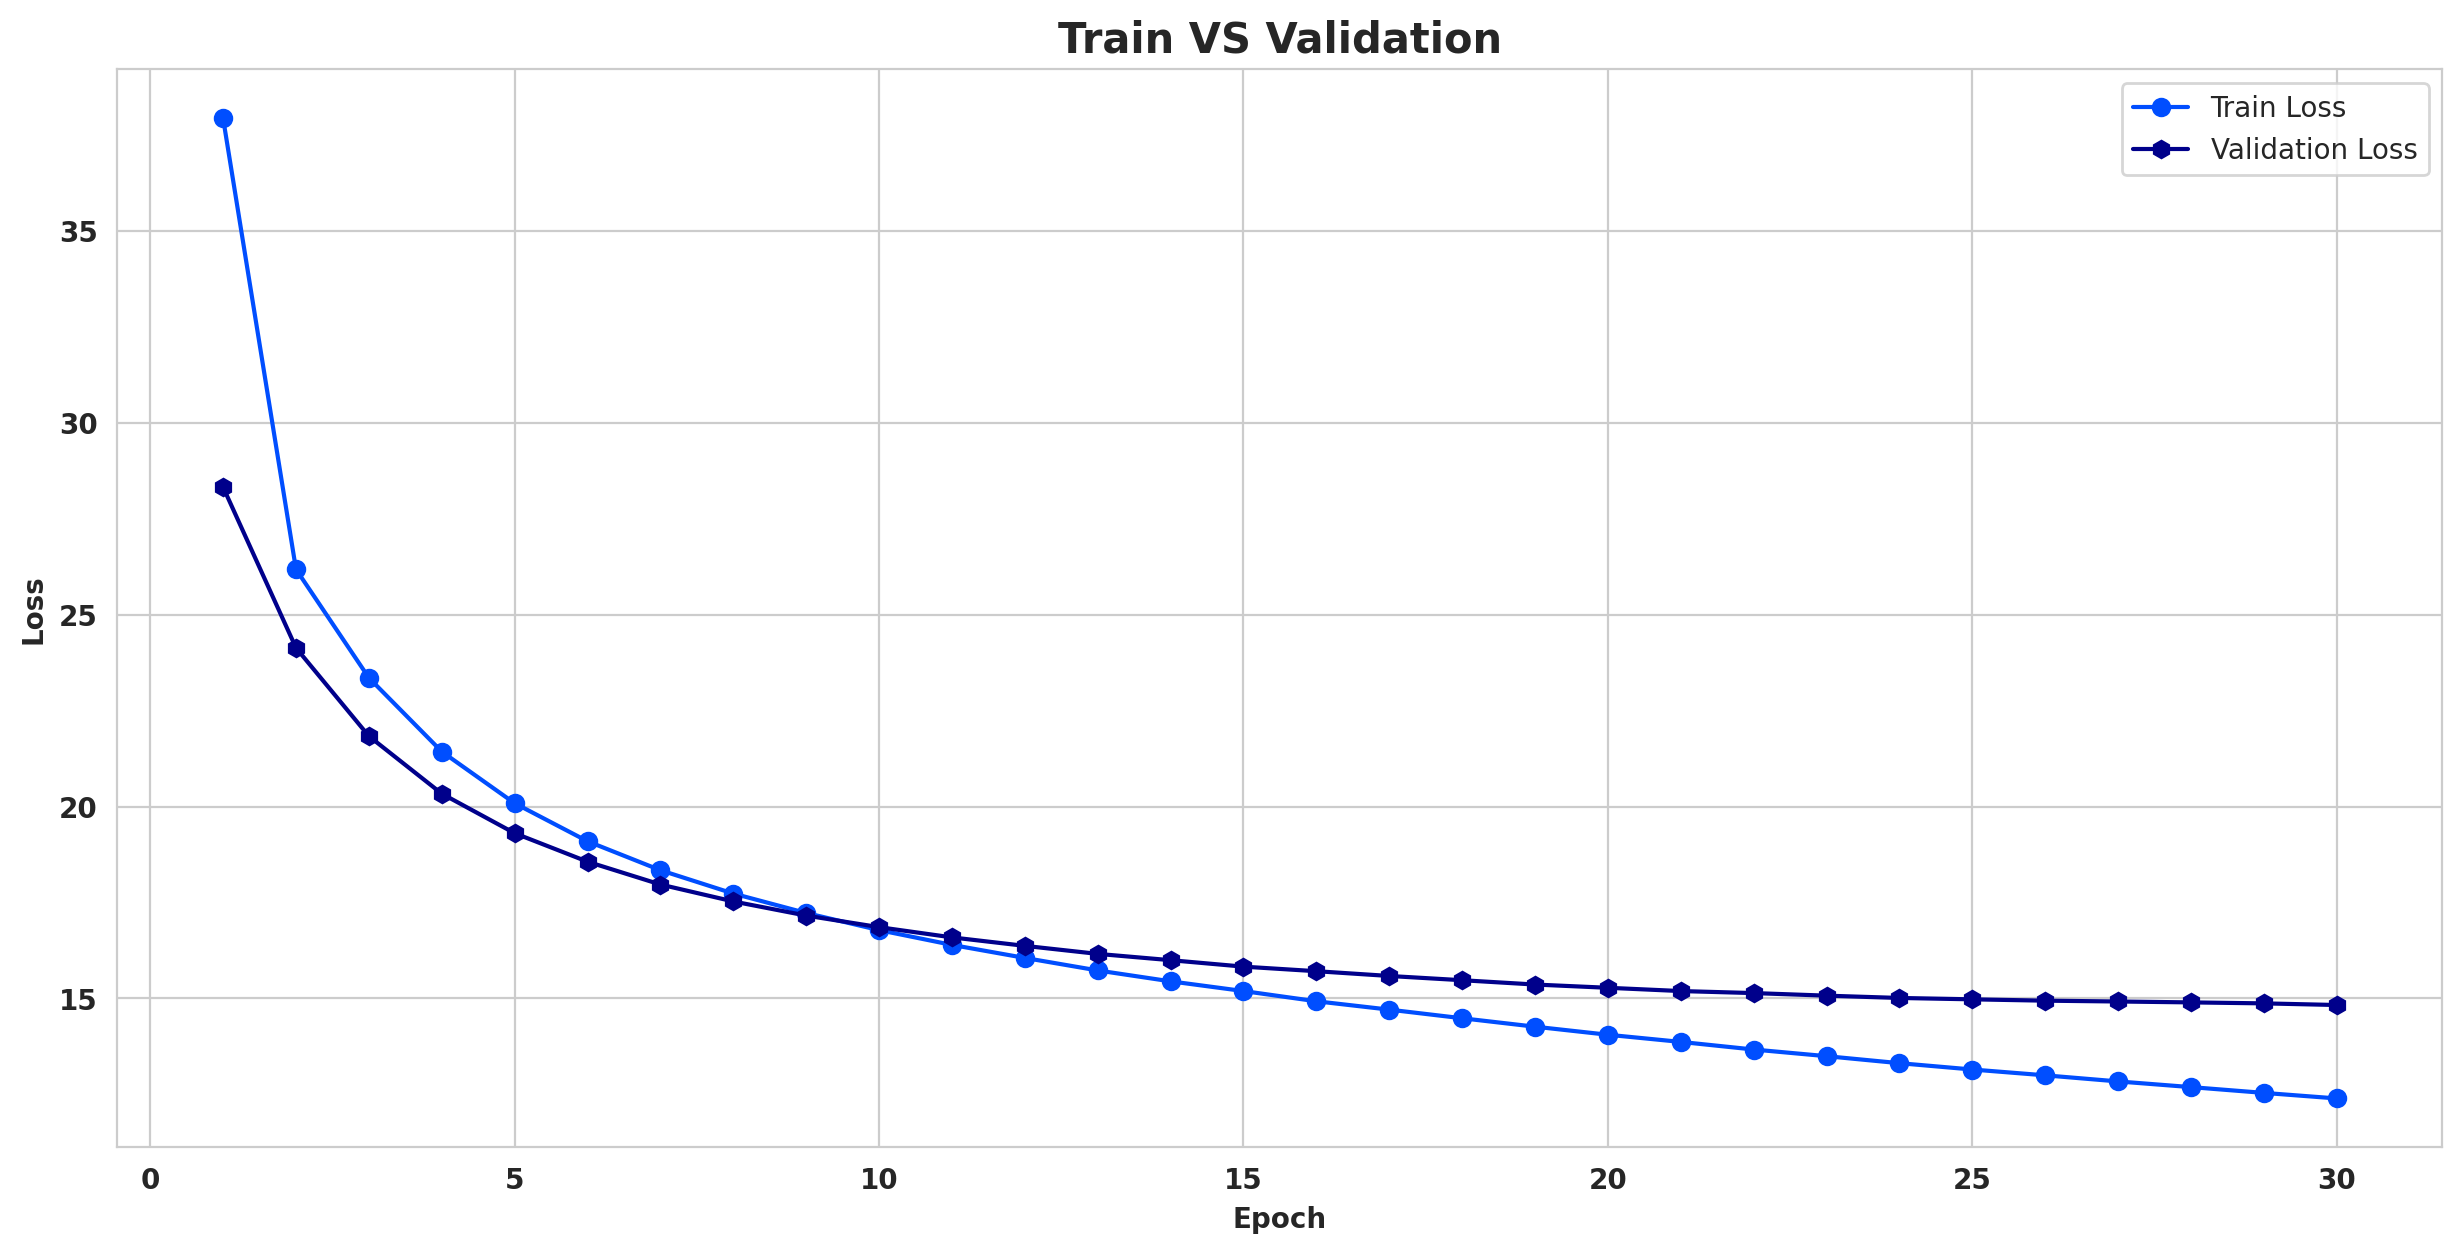

In [ ]:
plt.figure(figsize=(15, 7), dpi=200)
sns.set_style('whitegrid')
plt.plot([x+1 for x in range(len(history.history['loss']))], history.history['loss'], color='#004EFF', marker='o')
plt.plot([x+1 for x in range(len(history.history['loss']))], history.history['val_loss'], color='#00008B', marker='h')
plt.title('Train VS Validation', fontsize=15, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Epoch', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.legend(['Train Loss', 'Validation Loss'], loc='best')
plt.show()

##  Inference & Evaluation

During inference, we generate captions for new images using the trained Transformer model. The decoder predicts one word at a time, using the image features and the previously generated words.

- ***How It Works***
  - Caption Generation: At each time step, the decoder takes as input the embedded image features along with the decoded captions (starting with "start" at the first time step), predicting the probabilities of the next word.

  - Greedy Decoding: At each step, we select the word with the highest probability.

  - Stopping Criteria: Generation stops when we reach the "end" token or hit the maximum sequence length.

  - Evaluation Metric: The BLEU Score compares the generated caption with multiple ground truth captions to assess quality.

  - Visualization: Captions can be displayed alongside images to visually assess performance.


In [ ]:
vocab = vectorization.get_vocabulary()
INDEX_TO_WORD = {idx: word for idx, word in enumerate(vocab)}
MAX_DECODED_SENTENCE_LENGTH = SEQ_LENGTH - 1
test_images = list(test_data.keys())

def greedy_algorithm(image):
    # Read the image from the disk
    image = decode_and_resize(image)

    # Pass the image to the CNN
    image = tf.expand_dims(image, 0)
    image = caption_model.cnn_model(image)

    # Pass the image features to the Transformer encoder
    encoded_img = caption_model.encoder(image, training=False)

    # Generate the caption using the Transformer decoder
    decoded_caption = "<start> "
    for i in range(MAX_DECODED_SENTENCE_LENGTH):
        tokenized_caption = vectorization([decoded_caption])[:, :-1]
        mask = tf.math.not_equal(tokenized_caption, 0)
        predictions = caption_model.decoder(tokenized_caption, encoded_img, training=False, mask=mask)
        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = INDEX_TO_WORD[sampled_token_index]
        if sampled_token == "<end>":
            break
        decoded_caption += " " + sampled_token

    decoded_caption = decoded_caption.replace("<start> ", "")
    decoded_caption = decoded_caption.replace(" <end>", "").strip()

    return decoded_caption

In [ ]:
# Generating captions
generated_captions = {}

pbar = tqdm_notebook(total=len(test_data), position=0, leave=True, colour='green')
for image_id in test_data:
    cap = greedy_algorithm(image_id)
    generated_captions[image_id] = cap
    pbar.update(1)

pbar.close()

  0%|          | 0/77 [00:00<?, ?it/s]

In [ ]:
# Calculates BLEU score of predictions
def BLEU_score(actual, predicted):
    # Standardizing the actual captions
    processed_actual = []
    for i in actual:
        cap = [INDEX_TO_WORD[x] for x in vectorization(i).numpy() if INDEX_TO_WORD[x] != '']
        cap = ' '.join(cap)
        processed_actual.append(cap)

    # Calculating the BLEU score by comparing the predicted caption with five actual captions.
    b1=corpus_bleu(processed_actual, predicted, weights=(1.0, 0, 0, 0))
    b2=corpus_bleu(processed_actual, predicted, weights=(0.5, 0.5, 0, 0))
    b3=corpus_bleu(processed_actual, predicted, weights=(0.3, 0.3, 0.3, 0))
    b4=corpus_bleu(processed_actual, predicted, weights=(0.25, 0.25, 0.25, 0.25))

    return [
        (f'BLEU-4: {round(b4, 5)}'),
        (f'BLEU-3: {round(b3, 5)}'),
        (f'BLEU-2: {round(b2, 5)}'),
        (f'BLEU-1: {round(b1, 5)}'),
        (f'Generated Caption: {predicted[0]}'),
    ]

## Visualizing Generated Captions

This step allows us to visually inspect the performance of the model by plotting:
- The original test image
- The generated caption
- The associated BLEU scores

This helps in better understanding the model’s strengths and weaknesses through qualitative analysis.


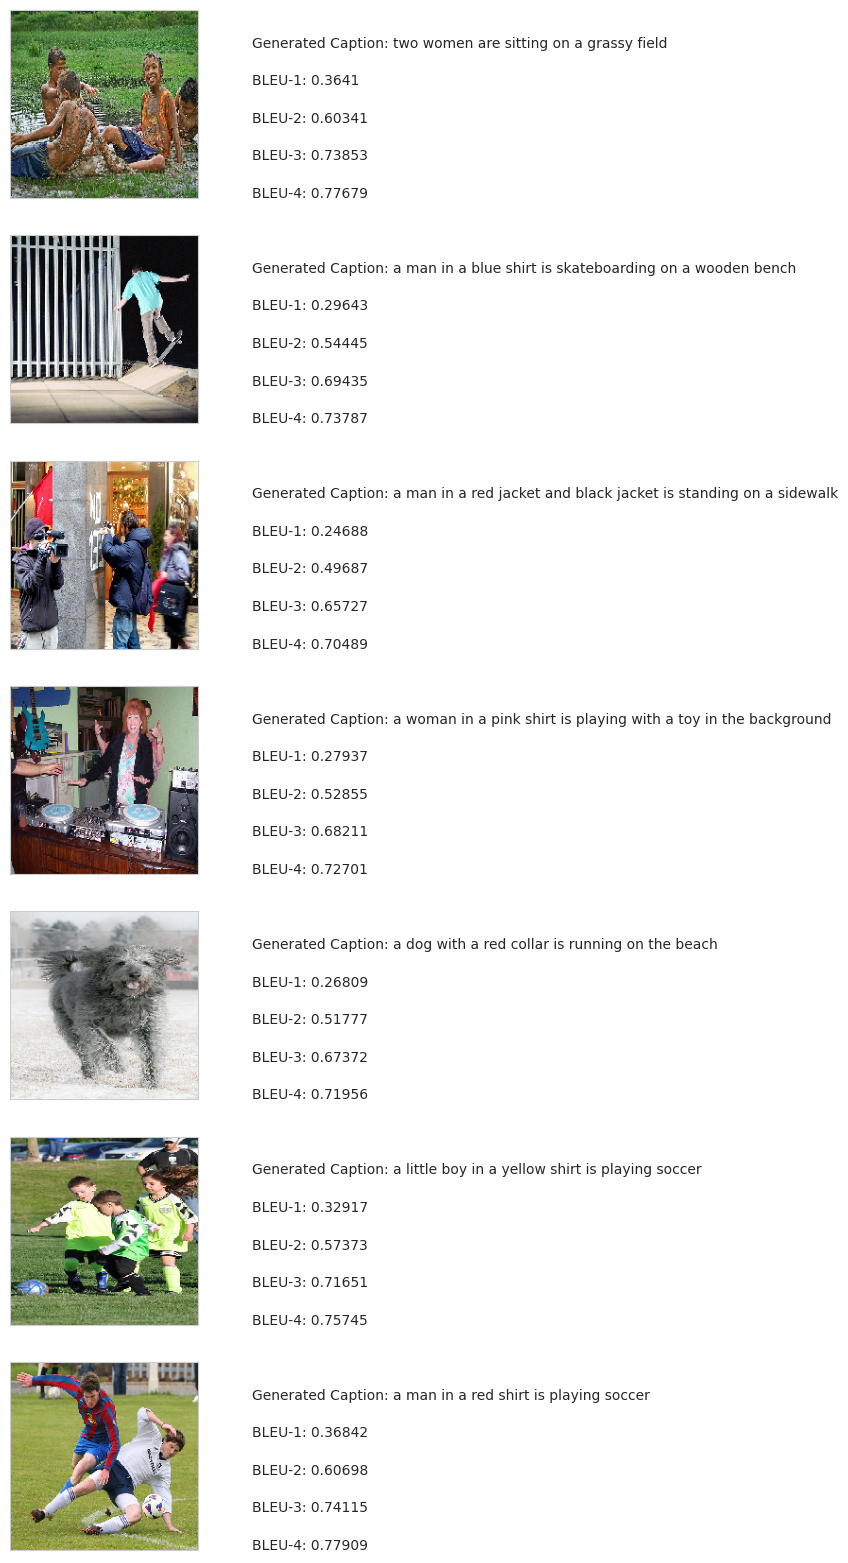

In [ ]:
def visualization(data, generated_captions, evaluator, num_of_images):
    keys = list(data.keys()) # List of all test images
    images = [np.random.choice(keys) for i in range(num_of_images)] # Randomly selected images

    count = 1
    fig = plt.figure(figsize=(6,20))
    for filename in images:
        actual_cap = data[filename]
        actual_cap = [x.replace("<start> ", "") for x in actual_cap] # Removing the start token
        actual_cap = [x.replace(" <end>", "") for x in actual_cap] # Removing the end token

        caption = generated_captions[filename]
        # Getting the bleu score
        caps_with_score = evaluator(actual_cap, [caption]*(len(actual_cap)))

        image_load = load_img(filename, target_size=(199,199,3))
        ax = fig.add_subplot(num_of_images,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1

        ax = fig.add_subplot(num_of_images,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(caps_with_score))
        for i, text in enumerate(caps_with_score):
            ax.text(0,i,text,fontsize=10)
        count += 1
    plt.show()

visualization(test_data, generated_captions, BLEU_score, 7)

### Analysis of Results

* **Most captions show moderate accuracy**, with BLEU-1 scores ranging from \~0.24 to \~0.36. This indicates that while key words are often present, full sentence matching isn't always precise.
* **Higher BLEU-4 scores (\~0.70–0.77)** suggest the model captures general sentence structure well, though specific object details (e.g., clothing colors or actions) are sometimes incorrect.
* The caption about **"two women" in a muddy scene** and the **soccer-playing individuals** received higher scores, likely due to the model's better recognition of common activities.
* **Lower scores** (e.g., man on the sidewalk) highlight challenges with complex or cluttered scenes, where background elements might mislead the model.






### **Conclusion: Transformer-based Image Captioning**

In this section, we implemented an advanced image captioning pipeline using the **Transformer architecture**, which brings significant improvements over traditional RNN-based models. By replacing sequential processing with **self-attention mechanisms**, Transformers enable better parallelization, stronger context awareness, and more accurate caption generation.

Through a well-structured encoder-decoder setup:

* The **CNN encoder** extracted rich image features.
* The **Transformer decoder** generated captions based on both positional and contextual information.
* We employed the **greedy decoding algorithm** and evaluated the output using **BLEU scores**, followed by qualitative visualization.

This architecture demonstrates promising results even on the limited **Flickr8k** dataset.



## **Final Thoughts and Future Directions**

While our approach yields strong performance, it's important to note that **more sophisticated models and larger datasets** can further enhance results.

### Other Powerful Architectures:

* **ViT-GPT2**: Combines **Vision Transformers (ViT)** for image encoding with **GPT-2** for text generation.
* **GIT** (Generative Image-to-text Transformer): A unified architecture that models the entire captioning pipeline end-to-end.

### Better Dataset → Better Performance

* This notebook uses **Flickr8k**, which contains 8,000 images.
* Training on **Flickr30k** or **MS-COCO**, which include **30,000+ images**, would likely **enhance the caption diversity and accuracy** significantly.

---

> **To sum up**, this notebook provided a complete journey through classical CNN+LSTM and modern Transformer-based image captioning approaches, along with training, evaluation, and visualization. This sets a solid foundation for further exploration into state-of-the-art vision-language models and multi-modal learning.

In [ ]:
!jupyter nbconvert --to html --execute Image_Captioning_DL_project_Amira_B_Ghofrane_B.ipynb